## Í∏∞Î≥∏ÏÑ§Ï†ï Î∞è Ìï®ÏàòÏ†ïÏùò

#### - Î™©Ìëú : 
#### 1. Î∂ÑÏÑù ÎåÄÏÉÅÏßÄÎ•º Ï§ëÏã¨ÏúºÎ°ú ÌÜ†ÏßÄÏù¥Ïö©Í≥ÑÌöç Î≥Ñ ÌÉÑÏÜå Î∞∞Ï∂ú Î∞è Ìù°Ïàò ÏöîÏù∏ÏùÑ Îã§Í∞ÅÎèÑÎ°ú Î∂ÑÏÑù
#### 2. Î∂ÑÏÑùÎåÄÏÉÅÏßÄÏùò Í∞úÎ∞úÍ≥ÑÌöç(ÌÜ†ÏßÄÏù¥Ïö© ÌäπÏÑ±, ÏÇ∞ÏóÖ Î∞è Í≤ΩÏ†ú ÌäπÏÑ±, Ïù∏Íµ¨, ÎåÄÏ§ëÍµêÌÜµÏùò Ï†ëÍ∑ºÏÑ± Îì±)Í≥º ÌÉÑÏÜå Î∞∞Ï∂ú Î∞è Ìù°Ïàò ÏöîÏù∏Ïùò Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌïòÍ≥†,<br>Ìï¥Îãπ ÏöîÏù∏Î≥Ñ Í∞ÄÏ§ëÏπòÎ•º ÎèÑÏ∂ú
#### 3. Î∂ÑÏÑùÍ≤∞Í≥ºÎäî Î∂ÑÏÑùÎåÄÏÉÅÏßÄÏó≠Ïùò Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìï¥ ÌÜ†ÏßÄÏù¥Ïö©Í≥ÑÌöçÎ≥Ñ 1„é°Îãπ(ÎòêÎäî 1Î™ÖÎãπ) ÌÉÑÏÜåÎ∞úÏÉùÎüâ/Ìù°ÏàòÎüâÏùÑ Í≥ÑÎüâÏ†Å ÏàòÏπòÎ°ú ÎèÑÏ∂úÌïòÍ≥† Î≥¥Í≥†ÏÑúÏóê Ìè¨Ìï®


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as offline
from folium.plugins import HeatMapWithTime
from plotly.subplots import make_subplots
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium import FeatureGroup
import json
import math
import re
from datetime import datetime
import os
import glob
import subprocess
from bs4 import BeautifulSoup as bs
from shapely.geometry import Point, Polygon, LineString
from shapely.ops import unary_union
import geopandas as gpd
from geopandas import GeoSeries
import pyproj
from tqdm import tqdm
from keplergl import KeplerGl
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# tqdmÏùò pandasÏ†ÑÏö© Î©îÏÜåÎìúÎ•º Ìò∏Ï∂ú
tqdm.pandas()
# Î™®Îì† Ïó¥Ïù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ï
pd.set_option('display.max_columns', None)
 
# PointÎ•ºÎßåÎìúÎäî Ìï®Ïàò
def make_point(x):
    try:
        return Point(x)
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
# PolygonÏùÑ ÎßåÎìúÎäî Ìï®Ïàò
def make_pol(x):
    try:
        return Polygon(x[0])
    except:
        return Polygon(x[0][0])
    
# LinestringÏùÑ ÎßåÎìúÎäî Ìï®Ïàò
def make_lin(x):
    try:
        return LineString(x)
    except:
        return LineString(x[0])

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ GeoPandas Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def geo_transform(DataFrame) :
    # csv to geopandas
    # lon, lat dataÎ•º geometryÎ°ú Î≥ÄÍ≤Ω
    DataFrame['lat'] = DataFrame['lat'].astype(float)
    DataFrame['lon'] = DataFrame['lon'].astype(float)
    DataFrame['geometry'] = DataFrame.progress_apply(lambda row : Point([row['lon'], row['lat']]), axis=1) # ÏúÑÎèÑ Î∞è Í≤ΩÎèÑÎ°§ GeoPandas Point Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
    DataFrame = gpd.GeoDataFrame(DataFrame, geometry='geometry')
    DataFrame.crs = {'init':'epsg:4326'} # geopandas Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ï¢åÌëúÍ≥ÑÎ•º EPSG 4326ÏúºÎ°ú ÏÑ§Ï†ï
    DataFrame = DataFrame.to_crs({'init':'epsg:4326'}) # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ï¢åÌëúÍ≥ÑÎ•º ÏûêÏ≤¥ Ï¢åÌëúÍ≥ÑÏóêÏÑú EPSG 4326ÏúºÎ°ú Î≥ÄÌôò
    return DataFrame

##### ÌñâÏ†ïÎèô

In [2]:
# ÏÜ°ÌååÍµ¨ ÌñâÏ†ïÎèô Îç∞Ïù¥ÌÑ∞
shapefile_path1 = "SBJ_2504_001/bnd_dong_11240_2023_4Q/bnd_dong_11240_2023_4Q.shp"
songpa_gdf = gpd.read_file(shapefile_path1)
songpa_gdf = songpa_gdf.to_crs(epsg=4326) #EPSG4326 ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

# Ïù∏Ï≤úÏÑúÍµ¨ ÌñâÏ†ïÎèô Îç∞Ïù¥ÌÑ∞
shapefile_path1 = "SBJ_2504_001/bnd_dong_23080_2023_4Q/bnd_dong_23080_2023_4Q.shp"
incheon_seo_gdf = gpd.read_file(shapefile_path1)
incheon_seo_gdf = incheon_seo_gdf.to_crs(epsg=4326) #EPSG4326 ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

# ÏÑ±ÎÇ®Ïãú ÏàòÏ†ïÍµ¨ ÌñâÏ†ïÎèô Îç∞Ïù¥ÌÑ∞
shapefile_path1 = "SBJ_2504_001/bnd_dong_31021_2023_4Q/bnd_dong_31021_2023_4Q.shp"
sungnam_soojung_gdf = gpd.read_file(shapefile_path1)
sungnam_soojung_gdf = sungnam_soojung_gdf.to_crs(epsg=4326) #EPSG4326 ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

# # ÏÑ±ÎÇ®Ïãú Ï§ëÏõêÍµ¨ ÌñâÏ†ïÎèô Îç∞Ïù¥ÌÑ∞
# shapefile_path1 = "SBJ_2504_001/bnd_dong_31022_2023_4Q/bnd_dong_31022_2023_4Q.shp"
# sungnam_jungwon_gdf = gpd.read_file(shapefile_path1)
# sungnam_jungwon_gdf = sungnam_jungwon_gdf.to_crs(epsg=4326) #EPSG4326 ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

# # ÏÑ±ÎÇ®Ïãú Î∂ÑÎãπÍµ¨ ÌñâÏ†ïÎèô Îç∞Ïù¥ÌÑ∞
# shapefile_path1 = "SBJ_2504_001/bnd_dong_31023_2023_4Q/bnd_dong_31023_2023_4Q.shp"
# sungnam_bundang_gdf = gpd.read_file(shapefile_path1)
# sungnam_bundang_gdf = sungnam_bundang_gdf.to_crs(epsg=4326) #EPSG4326 ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

#  ÌïòÎÇ®Ïãú ÌñâÏ†ïÎèô Îç∞Ïù¥ÌÑ∞
shapefile_path1 = "SBJ_2504_001/bnd_dong_31180_2023_4Q/bnd_dong_31180_2023_4Q.shp"
hanam_gdf = gpd.read_file(shapefile_path1)
hanam_gdf = hanam_gdf.to_crs(epsg=4326) #EPSG4326 ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

#  ÌôîÏÑ±Ïãú ÌñâÏ†ïÎèô Îç∞Ïù¥ÌÑ∞
shapefile_path1 = "SBJ_2504_001/bnd_dong_31240_2023_4Q/bnd_dong_31240_2023_4Q.shp"
hwasung_gdf = gpd.read_file(shapefile_path1)
hwasung_gdf = hwasung_gdf.to_crs(epsg=4326) #EPSG4326 ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

# Í¥ëÎ™ÖÏãú ÌñâÏ†ïÎèô Îç∞Ïù¥ÌÑ∞
shapefile_path1 = "SBJ_2504_001/bnd_dong_31060_2023_4Q/bnd_dong_31060_2023_4Q.shp"
gwangmyung_gdf = gpd.read_file(shapefile_path1)
gwangmyung_gdf = gwangmyung_gdf.to_crs(epsg=4326) #EPSG4326 ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

# ÏãúÌù•Ïãú ÌñâÏ†ïÎèô Îç∞Ïù¥ÌÑ∞
shapefile_path1 = "SBJ_2504_001/bnd_dong_31150_2023_4Q/bnd_dong_31150_2023_4Q.shp"
siheung_gdf = gpd.read_file(shapefile_path1)
siheung_gdf = siheung_gdf.to_crs(epsg=4326) #EPSG4326 ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

# ÌïÑÏöîÌïú GeoDataFrameÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î¨∂Ïñ¥ÏÑú Î≥ëÌï©
gdf_list = [
    songpa_gdf, incheon_seo_gdf, sungnam_soojung_gdf,
    hanam_gdf, hwasung_gdf, gwangmyung_gdf, siheung_gdf
]

# ÌïòÎÇòÏùò GeoDataFrameÏúºÎ°ú ÌÜµÌï©
merged_area_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs="EPSG:4326")

#### ÌÜ†ÏßÄÏù¥Ïö©Í≥ÑÌöçÎèÑ

In [3]:
areaplan = gpd.read_file('SBJ_2504_001/11._ÌÜ†ÏßÄÏù¥Ïö©Í≥ÑÌöçÎèÑ.geojson', encoding='euc-kr')

areaplan = gpd.GeoDataFrame(areaplan, geometry='geometry')
areaplan = areaplan[['zoneName', 'blockName', 'blockType', 'geometry']]

# Î∂ÑÏÑùÎåÄÏÉÅ & Ï†ÅÏö©ÎåÄÏÉÅ Íµ¨Î∂Ñ
areaplan_analysis = areaplan[areaplan['zoneName']!='Í¥ëÎ™ÖÏãúÌù• Í≥µÍ≥µÏ£ºÌÉùÏßÄÍµ¨']
areaplan_analysis.loc[areaplan_analysis['blockName'] == 'D42', ['blockName', 'blockType']] = ['ÎèÑ', 'ÎèÑÎ°ú']
gwangmyeong_siheung = areaplan[areaplan['zoneName']=='Í¥ëÎ™ÖÏãúÌù• Í≥µÍ≥µÏ£ºÌÉùÏßÄÍµ¨']

# ÏóëÏÖÄ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
plan_info = pd.read_excel("SBJ_2504_001/26. (Ï∞∏Í≥†ÏûêÎ£å) ÌÜ†ÏßÄÏù¥Ïö©_Íµ¨Ïó≠Î≥ÑÍ≥ÑÌöç.xlsx")

groupings = {
    "1": ["D2-1", "D2-2"],  # Í±¥ÏÑ§Ìò∏Ïàò 96, Ïù∏Íµ¨ 239
    "2": ["D1-1", "D1-2", "D1-3", "D1-4", "D1-5", "D1-6", "D1-7", "D1-8", "D1-9", "D1-10", "D1-11", "D1-12", "D1-13", "D1-14",
          "D2-3", "D2-4", "D2-5", "D2-6", "D2-7", "D2-8", "D2-9", "D2-10", "D2-11"],  # 971, 2428
    "3": ["BD1-1", "BD1-2", "BD2-1", "BD2-2"],  # Í±¥ÏÑ§Ìò∏Ïàò 161, Ïù∏Íµ¨ 403
}
group_values = {
    "1": {"Í±¥ÏÑ§Ìò∏Ïàò": 96, "Ïù∏Íµ¨": 239},
    "2": {"Í±¥ÏÑ§Ìò∏Ïàò": 971, "Ïù∏Íµ¨": 2428},
    "3": {"Í±¥ÏÑ§Ìò∏Ïàò": 161, "Ïù∏Íµ¨": 403},
}

# ÏóëÏÖÄ Îç∞Ïù¥ÌÑ∞Ïóê Í±¥ÏÑ§Ìò∏Ïàò/Ïù∏Íµ¨ Î∞∞Î∂Ñ
plan_info["Í±¥ÏÑ§Ìò∏Ïàò_Ï∂îÏ†ï"] = None
plan_info["Ïù∏Íµ¨_Ï∂îÏ†ï"] = None

for group, zones in groupings.items():
    if group not in group_values:
        continue  # Í∞í ÏóÜÎäî Í∑∏Î£πÏùÄ ÏÉùÎûµ

    subset = plan_info[plan_info["Íµ¨Ïó≠"].isin(zones)].copy()
    total_area = subset["Î©¥Ï†Å"].sum()
    if total_area == 0:
        continue

    # ÎπÑÏú® Í≥ÑÏÇ∞
    area_ratio = subset["Î©¥Ï†Å"] / total_area
    plan_info.loc[plan_info["Íµ¨Ïó≠"].isin(zones), "Í±¥ÏÑ§Ìò∏Ïàò_Ï∂îÏ†ï"] = (area_ratio * group_values[group]["Í±¥ÏÑ§Ìò∏Ïàò"]).round().astype("Int64")
    plan_info.loc[plan_info["Íµ¨Ïó≠"].isin(zones), "Ïù∏Íµ¨_Ï∂îÏ†ï"] = (area_ratio * group_values[group]["Ïù∏Íµ¨"]).round().astype("Int64")

# Í∏∞Ï°¥ ÏΩîÎìú Ïù¥ÌõÑÏóê Ïù¥ Î∏îÎ°ùÎßå Ï∂îÍ∞Ä
for group, zones in groupings.items():
    if group not in group_values:
        continue  # Í∞íÏù¥ ÏóÜÎäî Í∑∏Î£πÏùÄ ÏÉùÎûµ

    # Í±¥ÏÑ§Ìò∏Ïàò_Ï∂îÏ†ï ‚Üí Í±¥ÏÑ§Ìò∏Ïàò, Ïù∏Íµ¨_Ï∂îÏ†ï ‚Üí Ïù∏Íµ¨
    plan_info.loc[plan_info["Íµ¨Ïó≠"].isin(zones), "Í±¥ÏÑ§Ìò∏Ïàò"] = plan_info.loc[plan_info["Íµ¨Ïó≠"].isin(zones), "Í±¥ÏÑ§Ìò∏Ïàò_Ï∂îÏ†ï"]
    plan_info.loc[plan_info["Íµ¨Ïó≠"].isin(zones), "Ïù∏Íµ¨"] = plan_info.loc[plan_info["Íµ¨Ïó≠"].isin(zones), "Ïù∏Íµ¨_Ï∂îÏ†ï"]

# ÌïÑÏöîÌïú Ïó¥Îßå ÏÑ†ÌÉù
columns_to_merge = ['Íµ¨Ïó≠', 'Î©¥Ï†Å', 'Í±¥ÏÑ§Ìò∏Ïàò', 'Ïù∏Íµ¨', 'Ï£ºÌÉùÏú†Ìòï']
plan_info = plan_info[columns_to_merge]

# Î≥ëÌï© ÏàòÌñâ ('blockName' <-> 'Íµ¨Ïó≠' Í∏∞Ï§Ä, left joinÏúºÎ°ú Í∏∞Ï°¥ areaplan_targetÏóê Ï∂îÍ∞Ä Ïó¥ Î∂ôÏù¥Í∏∞)
gwangmyeong_siheung = gwangmyeong_siheung.merge(plan_info, how='left', left_on='blockName', right_on='Íµ¨Ïó≠')
gwangmyeong_siheung['Í±¥ÏÑ§Ìò∏Ïàò'] = gwangmyeong_siheung['Í±¥ÏÑ§Ìò∏Ïàò'].astype('Int64')
gwangmyeong_siheung['Ïù∏Íµ¨'] = gwangmyeong_siheung['Ïù∏Íµ¨'].astype('Int64')

# Î∂àÌïÑÏöîÌïú 'Íµ¨Ïó≠' Ïó¥ Ï†úÍ±∞ (ÏõêÌïòÎäî Í≤ΩÏö∞)
gwangmyeong_siheung.drop(columns='Íµ¨Ïó≠', inplace=True)

In [4]:
dongtan = areaplan_analysis[(areaplan_analysis['zoneName'] == 'ÌôîÏÑ±ÎèôÌÉÑÏßÄÍµ¨ ÌÉùÏßÄÍ∞úÎ∞úÏÇ¨ÏóÖ')|(areaplan_analysis['zoneName'] == 'ÌôîÏÑ±ÎèôÌÉÑ2ÏßÄÍµ¨ ÌÉùÏßÄÍ∞úÎ∞úÏòàÏ†ïÏßÄÍµ¨')]
dongtan_polygon = unary_union(dongtan.geometry)

wirye = areaplan_analysis[areaplan_analysis['zoneName'] == 'ÏúÑÎ°Ä ÌÉùÏßÄÍ∞úÎ∞úÏÇ¨ÏóÖ Í∞úÎ∞úÍ≥ÑÌöç']
wirye_polygon = unary_union(wirye.geometry)

cheongna = areaplan_analysis[areaplan_analysis['zoneName'] == 'Ïù∏Ï≤úÍ≤ΩÏ†úÏûêÏú†Íµ¨Ïó≠ Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú']
cheongna_polygon = unary_union(cheongna.geometry)

misa = areaplan_analysis[areaplan_analysis['zoneName'] == 'ÌïòÎÇ®ÎØ∏ÏÇ¨ Í≥µÍ≥µÏ£ºÌÉùÏßÄÍµ¨ Ï°∞ÏÑ±ÏÇ¨ÏóÖ']
misa_polygon = unary_union(misa.geometry)

gwangmyeong_siheung_polygon = unary_union(gwangmyeong_siheung.geometry)

# ÌïÑÏöîÌïú GeoDataFrameÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î¨∂Ïñ¥ÏÑú Î≥ëÌï©
gdf_list = [
    dongtan, wirye, cheongna,
    misa, gwangmyeong_siheung
]

# ÌïòÎÇòÏùò GeoDataFrameÏúºÎ°ú ÌÜµÌï©
merged_area_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs="EPSG:4326")
merged_area_gdf = merged_area_gdf[['zoneName','blockType','geometry']] # ,'blockType'

# blockType ‚Üí Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Îß§ÌïëÌï† ÏÇ¨Ï†Ñ Ï†ïÏùò
blocktype_mapping = {
    'Í≥µÎèôÏ£ºÌÉù': ['ÏïÑÌååÌä∏', 'Í≥µÎèôÏ£ºÌÉù', 'Ïó∞Î¶ΩÏ£ºÌÉù', 'Îã§ÏÑ∏ÎåÄÏ£ºÌÉù'],
    'ÏÉÅÏóÖ': ['Í∑ºÎ¶∞ÏÉÅÏóÖ', 'ÏùºÎ∞òÏÉÅÏóÖ', 'Ï§ëÏã¨ÏÉÅÏóÖ', 'ÏÉÅÏóÖÏãúÏÑ§', 'Ï£ºÏÉÅÎ≥µÌï©'],
    'ÏÇ∞ÏóÖ': ['ÏÇ∞ÏóÖÏö©ÏßÄ', 'ÏÇ∞ÏóÖÏãúÏÑ§Í∏∞ÌÉÄ', 'Ìà¨ÏûêÏú†ÏπòÏö©ÏßÄ'],
    'Í≥µÏõê': ['Í≥µÏõê', 'ÎèÑÏãúÍ≥µÏõê', 'Î¨∏ÌôîÍ≥µÏõê', 'Í∑ºÎ¶∞Í≥µÏõê', 'Í≥µÏõêÍ∏∞ÌÉÄ'],
    'ÎÖπÏßÄ': ['ÎÖπÏßÄ', 'ÏôÑÏ∂©ÎÖπÏßÄ', 'ÎÖπÏßÄÏãúÏÑ§', 'Ïó∞Í≤∞ÎÖπÏßÄ'],
    'Îã®ÎèÖÏ£ºÌÉù': ['Îã®ÎèÖÏ£ºÌÉù'],
    'ÎèÑÎ°ú': ['ÎèÑÎ°ú', 'ÍµêÌÜµÍ¥ëÏû•', 'Î≥¥ÌñâÏûêÏ†ÑÏö©ÎèÑÎ°ú'],
    'ÌïòÏ≤ú': ['ÌïòÏ≤ú', 'ÏàòÎ°ú', 'Ï†ÄÏàòÏßÄ']
}

# Ïó≠Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
reverse_mapping = {}
for category, subtypes in blocktype_mapping.items():
    for subtype in subtypes:
        reverse_mapping[subtype] = category

# Í∏∞Ï°¥ blockTypeÏùÑ ÌÜµÌï©Îêú Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Ïû¨Î∂ÑÎ•ò
merged_area_gdf['blockType'] = merged_area_gdf['blockType'].map(reverse_mapping)
merged_area_gdf['blockType'] = merged_area_gdf['blockType'].fillna('Í∏∞ÌÉÄ')

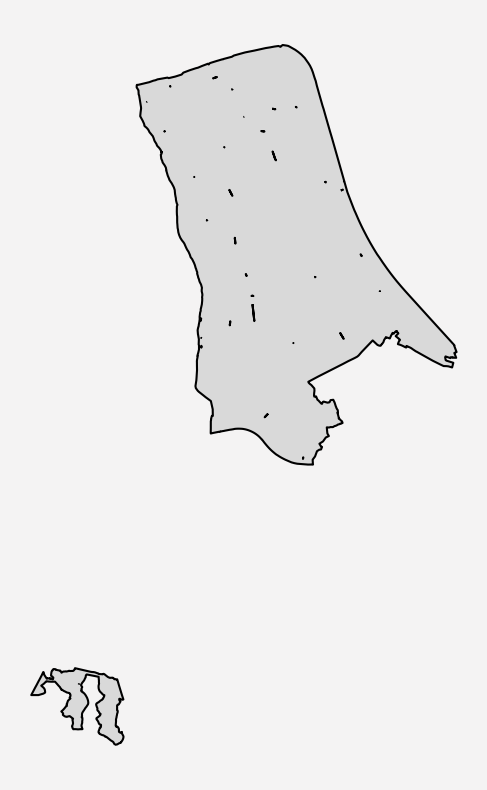

In [46]:
# Î∞∞Í≤ΩÏÉâ ÏÑ§Ï†ï
plt.rcParams["figure.facecolor"] = "#f4f3f3"

# Î™®Îì† Ìè¥Î¶¨Í≥§ÏùÑ ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞ (ÌÜ†ÏßÄÏö©ÎèÑ Íµ¨Î∂Ñ ÏóÜÏù¥)
merged_geom = unary_union(misa.geometry)

# Îã®Ïùº Ìè¥Î¶¨Í≥§ GeoDataFrameÏúºÎ°ú Î≥ÄÌôò
merged_misa = gpd.GeoDataFrame(geometry=[merged_geom], crs=misa.crs)

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(10, 10))

# Î∞ùÏùÄ ÌöåÏÉâÏúºÎ°ú Ï±ÑÏö∞Í≥†, ÏßÑÌïú Í≤ÄÏùÄÏÉâ Ïô∏Í≥ΩÏÑ†Îßå
merged_misa.plot(ax=ax, facecolor='#d9d9d9', edgecolor='black', linewidth=1.5)

# Ï∂ï Ï†úÍ±∞
ax.axis('off')

plt.show()

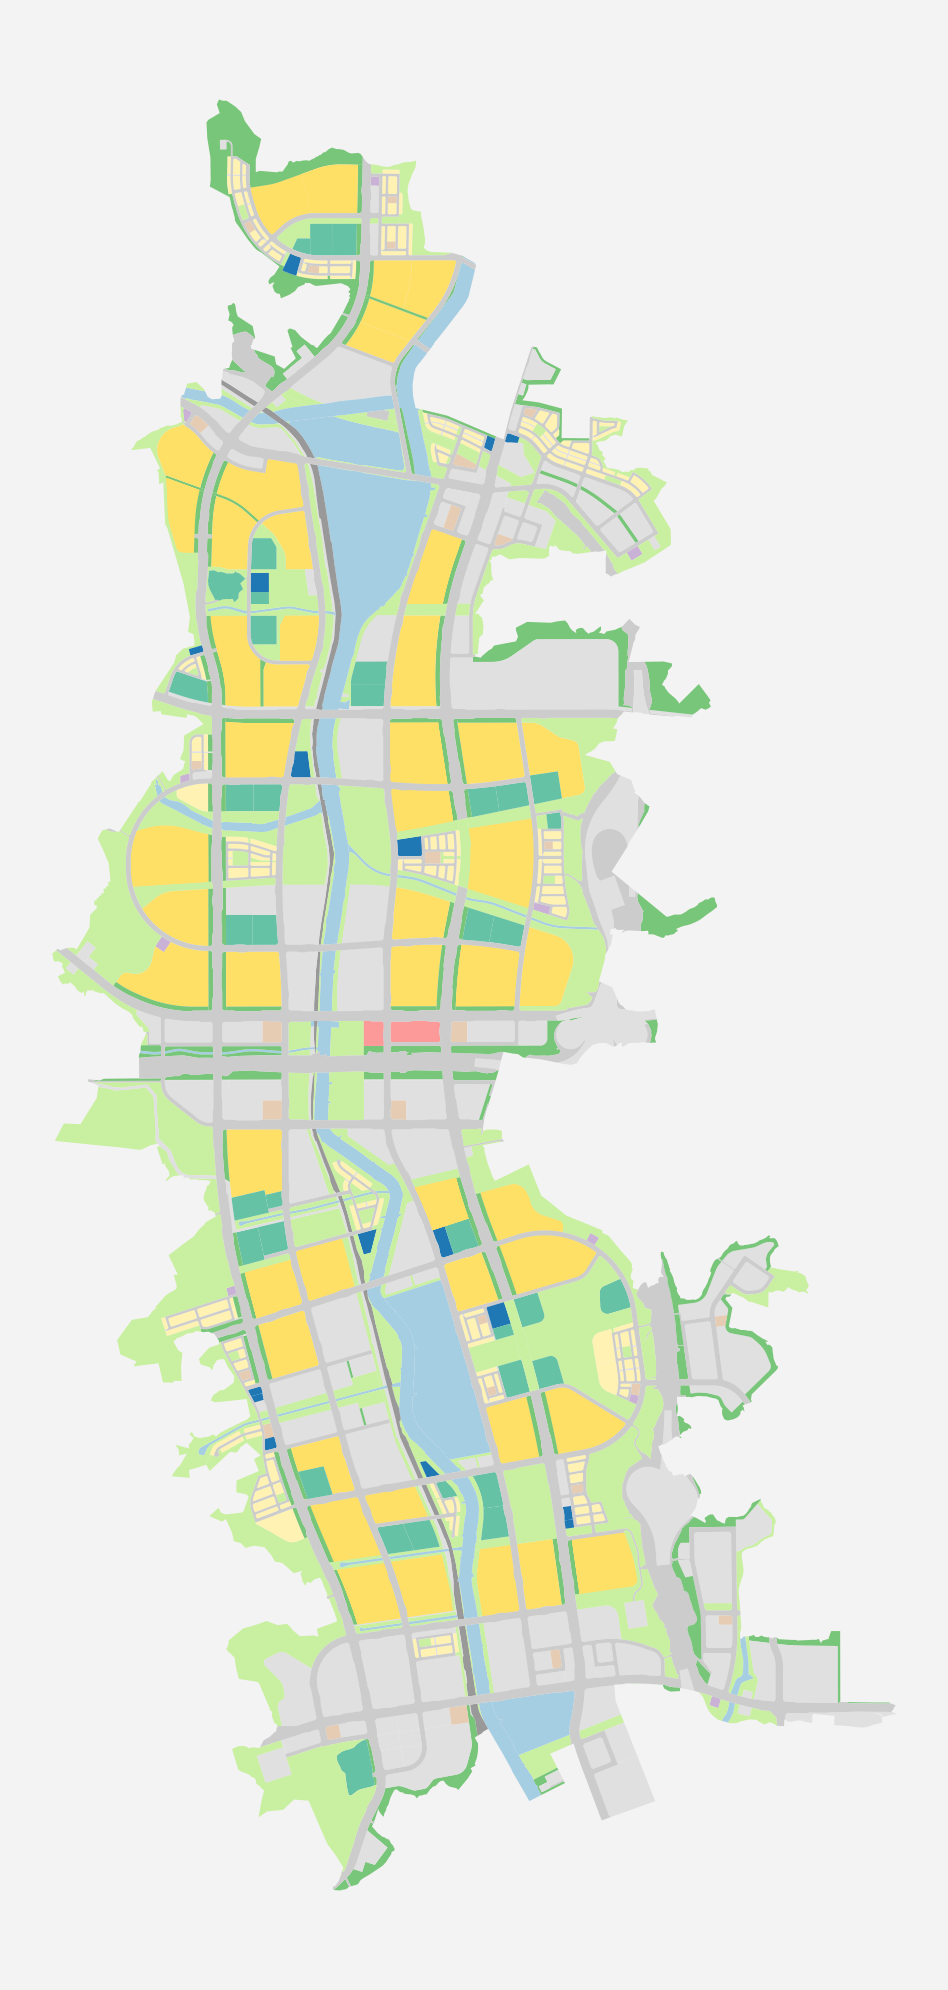

In [39]:
# ÏãúÍ∞ÅÌôî
# ÏÉâÏÉÅ Îß§Ìïë (ÌïÑÏöîÏóê Îî∞Îùº Ï∂îÍ∞Ä/ÏàòÏ†ï)
color_dict = {
    'Îã®ÎèÖÏ£ºÌÉù': '#fff2b2',
    'Í≥µÎèôÏ£ºÌÉù': '#ffe066',
    'Í≥µÏõê': '#c9f0a0',
    'ÎÖπÏßÄ': '#78c679',
    'ÎèÑÎ°ú': '#cccccc',
    'Ï≤†ÎèÑÏãúÏÑ§Ïö©ÏßÄ': '#999999',
    'ÌïòÏ≤ú': '#a6cee3',
    'Í≥µÍ≥µÏ≤≠ÏÇ¨': '#1f78b4',
    'Ï¢ÖÍµêÏãúÏÑ§': '#cab2d6',
    'ÏóÖÎ¨¥ÏãúÏÑ§': '#fb9a99',
    'ÍµêÏú°ÏãúÏÑ§': '#66c2a5',
    'Ï£ºÏ∞®Ïû•': '#e6ccb3'
}


# Í∏∞Î≥∏Í∞í ÌöåÏÉâÏúºÎ°ú ÏÑ§Ï†ï
gwangmyeong_siheung['color'] = gwangmyeong_siheung['blockType'].map(color_dict).fillna('#e0e0e0')
fig, ax = plt.subplots(figsize=(20, 20), facecolor='#f4f3f3')
ax.set_facecolor('#f4f3f3')

gwangmyeong_siheung.plot(color=gwangmyeong_siheung['color'], ax=ax)
ax.axis('off')
plt.tight_layout()
plt.show()

#### ÎèÑÎ°úÎßù

In [6]:
# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/17._Ï£ºÏöîÎèÑÎ°úÎßù_ÎÑ§Ìä∏ÏõåÌÅ¨.geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
roadsystem_df = pd.json_normalize(geojson_data['features'])
roadsystem_df['geometry'] = roadsystem_df['geometry.coordinates'].apply(lambda x : make_lin(x))
roadsystem_df['properties.k_link_id'] = roadsystem_df['properties.k_link_id'].astype(str)
roadsystem_df.drop(columns="geometry.coordinates", axis=1, inplace=True)
# roadsystem_df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ GeoDataFrameÏúºÎ°ú Î≥ÄÌôò
roadsystem_df = gpd.GeoDataFrame(roadsystem_df, geometry='geometry')

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
roadsystem_df.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in roadsystem_df.columns
]
roadsystem_df = roadsystem_df.rename(columns={'k_link_id': 'link_id', 'k_length': 'length'})
roadsystem_df = roadsystem_df[['link_id', 'geometry', 'fnode_id', 'tnode_id', 'road_rank', 'road_name', 'link_type', 'lane', 'length']]
roadsystem_df = gpd.clip(roadsystem_df, merged_area_gdf)

C:\Users\user\AppData\Local\Temp\ipykernel_4312\800854828.py:18: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326




In [7]:
from shapely.affinity import translate
# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/21._ÏÉÅÏÑ∏ÎèÑÎ°úÎßù_ÎÑ§Ìä∏ÏõåÌÅ¨.geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
detail_roadsystem_df = pd.json_normalize(geojson_data['features'])
detail_roadsystem_df['geometry'] = detail_roadsystem_df['geometry.coordinates'].apply(lambda x : make_lin(x))
detail_roadsystem_df['properties.link_id'] = detail_roadsystem_df['properties.link_id'].astype(str)
detail_roadsystem_df.drop(columns="geometry.coordinates", axis=1, inplace=True)
# detail_roadsystem_df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ GeoDataFrameÏúºÎ°ú Î≥ÄÌôò
detail_roadsystem_df = gpd.GeoDataFrame(detail_roadsystem_df, geometry='geometry')

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
detail_roadsystem_df.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in detail_roadsystem_df.columns
]
detail_roadsystem_df['geometry'] = detail_roadsystem_df['geometry'].apply(
    lambda geom: translate(geom, xoff=0.0022, yoff=0.0006)
)
detail_roadsystem_df = detail_roadsystem_df[['link_id', 'geometry', 'road_rank', 'road_name', 'lanes', 'length']]
detail_roadsystem_df = gpd.clip(detail_roadsystem_df, merged_area_gdf)

C:\Users\user\AppData\Local\Temp\ipykernel_4312\316403658.py:21: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326




##### Î∂ÑÏÑùÎåÄÏÉÅÏßÄ Í≤©Ïûê

In [8]:
# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/09. Í≤©Ïûê(Î∂ÑÏÑùÎåÄÏÉÅÏßÄ).geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
grid_analyze = pd.json_normalize(geojson_data['features'])
grid_analyze['geometry'] = grid_analyze['geometry.coordinates'].apply(lambda x : make_pol(x))
grid_analyze.drop(columns="geometry.coordinates", axis=1, inplace=True)
# grid_analyze Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ GeoDataFrameÏúºÎ°ú Î≥ÄÌôò
grid_analyze = gpd.GeoDataFrame(grid_analyze, geometry='geometry')
grid_analyze_dict = dict(zip(grid_analyze['properties.gid'], grid_analyze['geometry']))

# Ï†úÍ±∞Ìï† Ïó¥ Î¶¨Ïä§Ìä∏
drop_cols = ['type', 'geometry.type']
grid_analyze = grid_analyze.drop(columns=drop_cols)

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
grid_analyze.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in grid_analyze.columns
]

# Í≤©ÏûêÏôÄ ÎèÑÏãúÍ≥µÍ∞ÑÏùò Í≥µÍ∞Ñ ÍµêÏ∞®
grid_analyze = gpd.sjoin(grid_analyze, merged_area_gdf, how='inner', predicate='intersects')

# ÌïÑÏöî ÏóÜÎäî Ïó¥ Ï†úÍ±∞ (sjoin Í≤∞Í≥ºÏóêÎäî index_right Îì± Ï∂îÍ∞ÄÎê®)
grid_analyze = grid_analyze.drop(columns=["index_right"])
grid_analyze = grid_analyze.drop_duplicates(['gid'], keep='last')
grid_analyze = grid_analyze[['gbn', 'gid', 'geometry', 'zoneName']].reset_index(drop=True)

# Ï†úÍ±∞Ìï† Î≤îÏúÑ Î™©Î°ù (start, end) ÌïòÎÇ®ÎØ∏ÏÇ¨ Í≥µÏóÖÏßÄÍµ¨Ïù∏Îç∞ 2Îã®Í≥ÑÎùº Ï∞©Í≥µ ÏïàÎê®.
remove_ranges = [
    ("Îã§ÏÇ¨703476", "Îã§ÏÇ¨703477"),
    ("Îã§ÏÇ¨704476", "Îã§ÏÇ¨704478"),
    ("Îã§ÏÇ¨705477", "Îã§ÏÇ¨705479"),
    ("Îã§ÏÇ¨706474", "Îã§ÏÇ¨706479"),
    ("Îã§ÏÇ¨707473", "Îã§ÏÇ¨707479"),
    ("Îã§ÏÇ¨708473", "Îã§ÏÇ¨708479"),
    ("Îã§ÏÇ¨709473", "Îã§ÏÇ¨709478"),
    ("Îã§ÏÇ¨710472", "Îã§ÏÇ¨710478"),
    ("Îã§ÏÇ¨711472", "Îã§ÏÇ¨711478"),
]

# 'gid'Ïùò Ïà´Ïûê Î∂ÄÎ∂ÑÎßå Ï∂îÏ∂ú
grid_analyze['gid_num'] = grid_analyze['gid'].str.extract(r'Îã§ÏÇ¨(\d{6})').astype(int)

# Ï†úÍ±∞Ìï† gid_num Í∞í Ï†ÄÏû•
remove_set = set()

for start, end in remove_ranges:
    start_num = int(start.replace("Îã§ÏÇ¨", ""))
    end_num = int(end.replace("Îã§ÏÇ¨", ""))
    remove_set.update(range(start_num, end_num + 1))  # inclusive range

# Ï†úÍ±∞
grid_analyze = grid_analyze[~grid_analyze['gid_num'].isin(remove_set)]

# ÏûÑÏãú Ïó¥ Ï†úÍ±∞
grid_analyze = grid_analyze.drop(columns='gid_num').reset_index(drop=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4312\3334991094.py:22: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326




#### Í≤©ÏûêÏóê ÌÜ†ÏßÄ Ïù¥Ïö©Í≥ÑÌöç Î∞òÏòÅ

In [9]:
# Ï¢åÌëúÍ≥Ñ ÏÑ§Ï†ï
merged_area_gdf = merged_area_gdf.set_crs(epsg=4326)
grid_analyze = grid_analyze.set_crs(epsg=4326)

# Î©¥Ï†Å Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ Ìà¨ÏòÅ (Î©¥Ï†Å Îã®ÏúÑ: m¬≤)
merged_proj = merged_area_gdf.to_crs(5179)
grid_proj = grid_analyze.to_crs(5179)

# blockTypeÎ≥Ñ Ï†ÑÏ≤¥ Î©¥Ï†Å Í≥ÑÏÇ∞ ‚Üí ÏÉÅÏúÑ NÍ∞ú Ï∂îÏ∂ú
merged_proj['area'] = merged_proj.geometry.area
top_types = (
    merged_proj.groupby('blockType')['area'].sum()
    .sort_values(ascending=False)
    .head(10)  # ÏÉÅÏúÑ ÏÑ†ÌÉù
    .index.tolist()
)

# blockType Î∂ÑÎ•ò (Í∏∞ÌÉÄ Ìè¨Ìï®)
merged_proj['blockType_grp'] = np.where(
    merged_proj['blockType'].isin(top_types),
    merged_proj['blockType'],
    'Í∏∞ÌÉÄ'
)

# Í≤©ÏûêÏôÄ blockType ÍµêÏ∞® ‚Üí Î©¥Ï†Å Í≥ÑÏÇ∞
inter = gpd.overlay(grid_proj[['gid', 'geometry']],
                    merged_proj[['blockType_grp', 'geometry']],
                    how='intersection')

inter['intersect_area'] = inter.geometry.area

# Í≤©ÏûêÎ≥Ñ blockType Î©¥Ï†Å ÏßëÍ≥Ñ (pivot)
pivot = (
    inter.groupby(['gid', 'blockType_grp'])['intersect_area']
    .sum()
    .reset_index()
    .pivot(index='gid', columns='blockType_grp', values='intersect_area')
    .fillna(0)
)

# ÎπÑÏú®(%)Î°ú Ï†ïÍ∑úÌôî
pivot['total'] = pivot.sum(axis=1)
ratio_df = pivot.div(pivot['total'], axis=0).drop(columns='total')

# ÏõêÎûò grid_analyzeÏóê Î≥ëÌï©
grid_analyze = grid_analyze.merge(ratio_df, on='gid', how='left')


In [ ]:
# Îßµ Ï†ÄÏû•
# grid_map.save_to_html(file_name="visualization/ÌôîÏÑ±Ïãú ÌòÑÌô©/ÌôîÏÑ±Ïãú Í≤©ÏûêÍ±∞Ï£ºÏù∏Íµ¨ map.html")

Map saved to visualization/ÌôîÏÑ±Ïãú ÌòÑÌô©/ÌôîÏÑ±Ïãú Í≤©ÏûêÍ±∞Ï£ºÏù∏Íµ¨ map.html!


#### Í≤©ÏûêÏù∏Íµ¨ÌÜµÍ≥Ñ

In [10]:
respop_df = pd.read_csv('SBJ_2504_001/01. ÏÑ±Ïó∞Î†πÎ≥Ñ_Í±∞Ï£ºÏù∏Íµ¨(Í≤©Ïûê).csv')

#grid ID Î¶¨Ïä§Ìä∏ ÏôÄ Îß§Ìïë & respop_df ÌïÑÌÑ∞ÎßÅ
grid_id = grid_analyze['gid'].tolist() # gidÎäî Ï†ÑÎ∂Ä uniqueÌïú Í∞í
grid_respop = respop_df[respop_df['gid'].isin(grid_id)]
grid_respop = grid_respop.fillna(0)
grid_respop = pd.concat([grid_respop.iloc[:, :2], grid_respop.iloc[:, 2:].astype(int)], axis=1)
grid_respop['year'] = grid_respop['year'].astype(str)

# ÏÑ±Î≥ÑÍµ¨Î∂Ñ ÏóÜÏù¥ ÌÜµÌï© Î∞è ÏÑ∏ÎåÄÎ≥Ñ Ïù∏Íµ¨Ïàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
columns = ['gbn', 'gid', 'year']
for i in range(3, len(grid_respop.columns)):
    age = f'{grid_respop.columns[i][2:4]}ÎåÄ' if grid_respop.columns[i][2] != '1' else f'{grid_respop.columns[i][2:5]}ÎåÄ'
    sex = 'ÎÇ®' if grid_respop.columns[i][0] != 'm' else 'Ïó¨'
    columns.append('%s_%s'%(age, sex))
grid_respop.columns = columns
# Ïù∏Íµ¨ column ÏÉùÏÑ±
grid_respop['Í±∞Ï£ºÏù∏Íµ¨'] = grid_respop.iloc[:, 3:].sum(axis=1)

# Ïó∞Î†πÎåÄÎ≥ÑÎ°ú ÏÑ±Î≥Ñ ÌÜµÌï©
grid_respop['20ÎåÄ'] = grid_respop['20ÎåÄ_Ïó¨'] + grid_respop['20ÎåÄ_ÎÇ®']
grid_respop['30ÎåÄ'] = grid_respop['30ÎåÄ_Ïó¨'] + grid_respop['30ÎåÄ_ÎÇ®']
grid_respop['40ÎåÄ'] = grid_respop['40ÎåÄ_Ïó¨'] + grid_respop['40ÎåÄ_ÎÇ®']
grid_respop['50ÎåÄ'] = grid_respop['50ÎåÄ_Ïó¨'] + grid_respop['50ÎåÄ_ÎÇ®']
grid_respop['60ÎåÄ'] = grid_respop['60ÎåÄ_Ïó¨'] + grid_respop['60ÎåÄ_ÎÇ®']
grid_respop['70ÎåÄ'] = grid_respop['70ÎåÄ_Ïó¨'] + grid_respop['70ÎåÄ_ÎÇ®']
grid_respop['80ÎåÄ'] = grid_respop['80ÎåÄ_Ïó¨'] + grid_respop['80ÎåÄ_ÎÇ®']
grid_respop['90ÎåÄ'] = grid_respop['90ÎåÄ_Ïó¨'] + grid_respop['90ÎåÄ_ÎÇ®']
grid_respop['100ÎåÄ'] = grid_respop['100ÎåÄ_Ïó¨'] + grid_respop['100ÎåÄ_ÎÇ®']

In [11]:
# Í±∞Ï£ºÏù∏Íµ¨ - Í≤©ÏûêÏóê mappingÏûëÏóÖ
grid_respop = grid_respop[['gbn', 'gid', 'Í±∞Ï£ºÏù∏Íµ¨']]

# ÏÉùÏÑ±Îêú map_dicÏóê filtered_respopÏùò gidÎ•º Îß§ÌïëÌïòÏó¨ 'geometry' column ÏÉùÏÑ±
geometry_lst = []
for _, row in tqdm(grid_respop.iterrows()):
    geometry_lst.append(grid_analyze_dict[row['gid']])
grid_respop['geometry'] = geometry_lst
grid_respop = gpd.GeoDataFrame(grid_respop, geometry='geometry')

# Î∂ÑÏÑùÎåÄÏÉÅÏßÄÏóê Îß§ÌïëÌïòÍ∏∞
grid_result = pd.merge(grid_analyze, grid_respop[['gid', 'Í±∞Ï£ºÏù∏Íµ¨']], on='gid', how='left')

# ÌïÑÏöîÌïú Ïó¥Îßå ÏÑ†ÌÉù
cols_to_sum = ['Í≥µÎèôÏ£ºÌÉù', 'ÏÉÅÏóÖ', 'ÏÇ∞ÏóÖ', 'Í≥µÏõê', 'ÎÖπÏßÄ', 'Îã®ÎèÖÏ£ºÌÉù', 'ÎèÑÎ°ú', 'ÌïòÏ≤ú', 'Í∏∞ÌÉÄ', 'Í±∞Ï£ºÏù∏Íµ¨']

# Í∑∏Î£πÌôî Î∞è Ìï©ÏÇ∞
grid_result = grid_result.groupby(['zoneName', 'gid', 'geometry'], as_index=False)[cols_to_sum].mean()

grid_result.rename(columns={'zoneName' : 'Íµ¨Î∂Ñ'}, inplace=True)
grid_result['Í±∞Ï£ºÏù∏Íµ¨'] = np.log1p(grid_result['Í±∞Ï£ºÏù∏Íµ¨'])

# Î≥ÄÌôò ÎîïÏÖîÎÑàÎ¶¨ Ï†ïÏùò
name_map = {
    'ÏúÑÎ°Ä ÌÉùÏßÄÍ∞úÎ∞úÏÇ¨ÏóÖ Í∞úÎ∞úÍ≥ÑÌöç': 'ÏúÑÎ°ÄÏã†ÎèÑÏãú',
    'Ïù∏Ï≤úÍ≤ΩÏ†úÏûêÏú†Íµ¨Ïó≠ Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú': 'Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú',
    'ÌïòÎÇ®ÎØ∏ÏÇ¨ Í≥µÍ≥µÏ£ºÌÉùÏßÄÍµ¨ Ï°∞ÏÑ±ÏÇ¨ÏóÖ': 'ÎØ∏ÏÇ¨Í∞ïÎ≥ÄÎèÑÏãú',
    'ÌôîÏÑ±ÎèôÌÉÑ2ÏßÄÍµ¨ ÌÉùÏßÄÍ∞úÎ∞úÏòàÏ†ïÏßÄÍµ¨': 'ÎèôÌÉÑÏã†ÎèÑÏãú',
    'ÌôîÏÑ±ÎèôÌÉÑÏßÄÍµ¨ ÌÉùÏßÄÍ∞úÎ∞úÏÇ¨ÏóÖ': 'ÎèôÌÉÑÏã†ÎèÑÏãú'
}

# 'Íµ¨Î∂Ñ' Ïó¥ Î≥ÄÌôò
grid_result['Íµ¨Î∂Ñ'] = grid_result['Íµ¨Î∂Ñ'].map(name_map)
grid_result = gpd.GeoDataFrame(grid_result, geometry='geometry')

7043it [00:00, 13840.70it/s]


#### Ïú†ÎèôÏù∏Íµ¨

In [12]:
# Ïú†ÎèôÏù∏Íµ¨ df Î°úÎìú
floating_population_df = pd.read_csv('SBJ_2504_001/05._ÏÑ±Ïó∞Î†πÎ≥Ñ_Ïú†ÎèôÏù∏Íµ¨.csv')
floating_population_df['STD_YM'] = floating_population_df['STD_YM'].astype(str)

# ÏÑ±Î≥ÑÍµ¨Î∂Ñ ÏóÜÏù¥ ÌÜµÌï© Î∞è ÏÑ∏ÎåÄÎ≥Ñ Ïù∏Íµ¨Ïàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
columns = ['gbn', 'year']
for i in range(2, 14):
    floating_population_df[floating_population_df.columns[i]] = floating_population_df[floating_population_df.columns[i]].astype(float)
    new_col = f'{floating_population_df.columns[i][2:4]}ÎåÄ_ÎÇ®' if floating_population_df.columns[i][0] == 'm' else f'{floating_population_df.columns[i][2:4]}ÎåÄ_Ïó¨'
    columns.append(new_col)
floating_population_df.columns = columns + floating_population_df.columns[14:16].tolist()
floating_population_df['Ï¥ùÌï©'] = floating_population_df.iloc[:, 2:-2].sum(axis=1)
floating_population_df['year'] = floating_population_df['year'].apply(lambda x : x[2:])
floating_population_df = geo_transform(floating_population_df)

col_lst = ['gbn', 'year'] + list(floating_population_df.columns[-2:]) + ['Ï¥ùÌï©']
floating_population_df = floating_population_df[col_lst]

floating_pop = gpd.sjoin(floating_population_df, grid_analyze, how='inner', op='within')

floating_pop['year'] = "20" + floating_pop['year'].astype(str).str[:2]
floating_pop['year'] = floating_pop['year'].astype(int)

# ÌïÑÏöîÌïú Ïó¥Îßå ÎÇ®Í∏∞Í∏∞
floating_pop = floating_pop.rename(columns={'properties.gid': 'gid'})
floating_pop = floating_pop[['gbn_left', 'gid', 'Ï¥ùÌï©', 'geometry']]
floating_pop = floating_pop.rename(columns={'gbn_left': 'gbn'})
floating_pop = pd.concat([floating_pop.iloc[:,:3], floating_pop.iloc[:,-1:]], axis=1)
floating_pop  = gpd.GeoDataFrame(floating_pop , geometry='geometry')

# Í∑∏Î£πÌôî Î∞è ÏßëÍ≥Ñ ÏàòÌñâ
floating_pop  = floating_pop.dissolve(
    by=['gbn', 'gid'],
    aggfunc={'Ï¥ùÌï©': 'sum'}
).reset_index()

floating_pop ['geometry'] = floating_pop ['gid'].map(grid_analyze_dict)
floating_pop  = gpd.GeoDataFrame(floating_pop , geometry='geometry')
floating_pop = floating_pop.rename(columns={'Ï¥ùÌï©': 'Ïú†ÎèôÏù∏Íµ¨'})

# Î∂ÑÏÑùÎåÄÏÉÅÏßÄÏóê Îß§ÌïëÌïòÍ∏∞
grid_result = pd.merge(grid_result, floating_pop[['gid', 'Ïú†ÎèôÏù∏Íµ¨']], on='gid', how='left')

# gidÏôÄ geometry Í∏∞Ï§ÄÏúºÎ°ú groupbyÌïòÍ≥† Í±∞Ï£ºÏù∏Íµ¨ Ìï©ÏÇ∞
agg_dict = {
    'Í≥µÎèôÏ£ºÌÉù': 'mean',
    'ÏÉÅÏóÖ': 'mean',
    'ÏÇ∞ÏóÖ': 'mean',
    'Í≥µÏõê': 'mean',
    'ÎÖπÏßÄ': 'mean',
    'Îã®ÎèÖÏ£ºÌÉù': 'mean',
    'ÎèÑÎ°ú': 'mean',
    'ÌïòÏ≤ú': 'mean',
    'Í∏∞ÌÉÄ': 'mean',
    'Í±∞Ï£ºÏù∏Íµ¨': 'mean',
    'Ïú†ÎèôÏù∏Íµ¨': 'sum'
}
grid_result = grid_result.groupby(['Íµ¨Î∂Ñ', 'gid', 'geometry'], as_index=False).agg(agg_dict)
grid_result = gpd.GeoDataFrame(grid_result, geometry='geometry')
grid_result['Ïú†ÎèôÏù∏Íµ¨'] = np.log1p(grid_result['Ïú†ÎèôÏù∏Íµ¨'])


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3734223/3734223 [02:39<00:00, 23398.04it/s]
c:\Users\user\anaconda3\envs\GIS\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

c:\Users\user\anaconda3\envs\GIS\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

c:\Users\user\anaconda3\envs\GIS\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\u

#### ÏÉÅÍ∂å Ï†ëÍ∑ºÏÑ±(ÌñâÏ†ïÍµ¨Ïó≠Î≥ÑÎ°ú Íµ¨Î∂ÑÌï¥ÏÑú ÎèÑÏ∂ú)

In [13]:
# Í∞Å ÎèÑÏãú Î©¥Ï†Å Í≥ÑÏÇ∞ ÌõÑ Î©¥Ï†Å Í∏∞Ï§ÄÏúºÎ°ú top_n, min_distance_km ÏÑ§Ï†ï

# ÏúÑÎ°ÄÏã†ÎèÑÏãú
wirye_gdf = wirye.to_crs(epsg=5179)  # meters-based Ï¢åÌëúÍ≥ÑÎ°ú Î≥ÄÌôò
area_wirye = wirye_gdf.geometry.area.sum() / 1e6  # km¬≤Î°ú Î≥ÄÌôò

# ÎèôÌÉÑÏã†ÎèÑÏãú
dongtan_gdf = dongtan.to_crs(epsg=5179)
area_dongtan = dongtan_gdf.geometry.area.sum() / 1e6

# ÎØ∏ÏÇ¨Í∞ïÎ≥ÄÎèÑÏãú
misa_gdf = misa.to_crs(epsg=5179)
area_misa = misa_gdf.geometry.area.sum() / 1e6

# Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú
cheongna_gdf = cheongna.to_crs(epsg=5179)
area_cheongna = cheongna_gdf.geometry.area.sum() / 1e6

In [14]:
# ÎèÑÏãúÎ≥Ñ Î©¥Ï†Å ÎîïÏÖîÎÑàÎ¶¨
area_dict = {
    'ÏúÑÎ°ÄÏã†ÎèÑÏãú': area_wirye,
    'ÎèôÌÉÑÏã†ÎèÑÏãú': area_dongtan,
    'ÎØ∏ÏÇ¨Í∞ïÎ≥ÄÎèÑÏãú': area_misa,
    'Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú': area_cheongna,
}

def get_kde_params(area_km2, base_area=100, base_top_n=10, base_distance=2, max_top_n=10):
    """
    ÎèÑÏãú Î©¥Ï†ÅÏùÑ Í∏∞Ï§ÄÏúºÎ°ú KDE ÌååÎùºÎØ∏ÌÑ∞(top_n, min_distance_km)Î•º ÏÑ§Ï†ï
    - top_nÏùÄ log1p ÎπÑÏú® Í∏∞Î∞òÏúºÎ°ú Ï¶ùÍ∞Ä
    - min_distance_kmÏùÄ sqrt Í∏∞Î∞ò Ï¶ùÍ∞Ä
    - Îëò Îã§ ÏÉÅÌïúÏÑ† ÏÑ§Ï†ï Í∞ÄÎä•
    """
    ratio = area_km2 / base_area

    # log Í∏∞Î∞ò ÏôÑÌôî Ï¶ùÍ∞Ä, ÏµúÏÜå 5Í∞ú Ïù¥ÏÉÅ, ÏµúÎåÄ max_top_n Ï†úÌïú
    top_n = min(max_top_n, max(5, int(base_top_n * np.log1p(ratio))))

    # Í±∞Î¶¨ Í∏∞Ï§ÄÏùÄ Î©¥Ï†ÅÏùò sqrt ÎπÑÎ°Ä Ï¶ùÍ∞Ä
    min_dist = round(base_distance * np.sqrt(ratio), 1)

    return top_n, min_dist

# ÎèÑÏãúÎ≥Ñ Îß§Í∞úÎ≥ÄÏàò Í≥ÑÏÇ∞
param_dict = {}
for city, area in area_dict.items():
    top_n, min_dist = get_kde_params(area)
    param_dict[city] = {'top_n': top_n, 'min_distance_km': min_dist}

# ÌôïÏù∏
from pprint import pprint
pprint(param_dict)

from scipy.stats import gaussian_kde
from geopy.distance import geodesic

business_area_data = pd.read_csv('SBJ_2504_001/02. ÏÉÅÍ∂åÏ†ïÎ≥¥.csv')
business_area_data = geo_transform(business_area_data)
# Í≤©ÏûêÏôÄ ÏÉÅÏ†ê ÏúÑÏπò Í∞Ñ Í≥µÍ∞Ñ Ï°∞Ïù∏: ÏÉÅÏ†êÏù¥ Í≤©Ïûê ÏïàÏóê Ìè¨Ìï®Îê† Í≤ΩÏö∞
joined = gpd.sjoin(
    business_area_data,
    grid_result[['geometry', 'Íµ¨Î∂Ñ']],
    how='left',
    predicate='within'  # ÎòêÎäî 'contains' Î∞©Ìñ•Ïóê Îî∞Îùº Îã§Î¶Ñ
)

# Í≤∞Í≥ºÎ•º ÏõêÎûò business_area_data ÌòïÏãùÏúºÎ°ú Ï†ïÎ¶¨
business_area_data['Íµ¨Î∂Ñ'] = joined['Íµ¨Î∂Ñ']

# ÎÇòÎàå Í∏∞Ï§ÄÏù¥ ÎêòÎäî ÏßÄÏó≠ Î¶¨Ïä§Ìä∏Î°ú ÏßÄÏó≠Î≥Ñ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Îã¥ÏùÑ ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
region_list = ['ÏúÑÎ°ÄÏã†ÎèÑÏãú', 'ÎèôÌÉÑÏã†ÎèÑÏãú', 'ÎØ∏ÏÇ¨Í∞ïÎ≥ÄÎèÑÏãú', 'Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú']
region_dfs = {}

# Í∞Å ÏßÄÏó≠Ïóê ÎåÄÌï¥ ÌïÑÌÑ∞ÎßÅÌïòÏó¨ Î≥ÑÎèÑ DataFrame ÏÉùÏÑ±
for region in region_list:
    region_dfs[region] = business_area_data[business_area_data['Íµ¨Î∂Ñ'] == region]

{'ÎèôÌÉÑÏã†ÎèÑÏãú': {'min_distance_km': 1.2, 'top_n': 5},
 'ÎØ∏ÏÇ¨Í∞ïÎ≥ÄÎèÑÏãú': {'min_distance_km': 0.5, 'top_n': 5},
 'ÏúÑÎ°ÄÏã†ÎèÑÏãú': {'min_distance_km': 0.5, 'top_n': 5},
 'Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú': {'min_distance_km': 0.8, 'top_n': 5}}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 108963/108963 [00:04<00:00, 22285.11it/s]
c:\Users\user\anaconda3\envs\GIS\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

c:\Users\user\anaconda3\envs\GIS\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

C:\Users\user\AppData\Local\Temp\ipykernel_4312\2112849615.py:42: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of th


‚ñ∂ ÏúÑÎ°ÄÏã†ÎèÑÏãú - top_n: 5, min_distance_km: 0.5


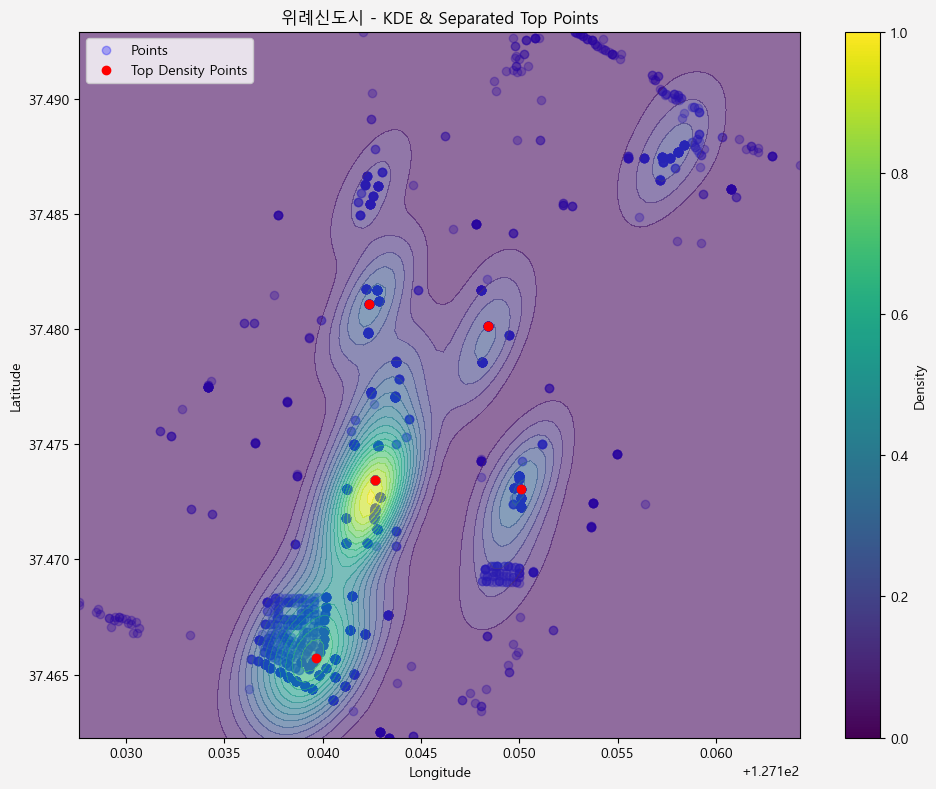


‚ñ∂ ÎèôÌÉÑÏã†ÎèÑÏãú - top_n: 5, min_distance_km: 1.2


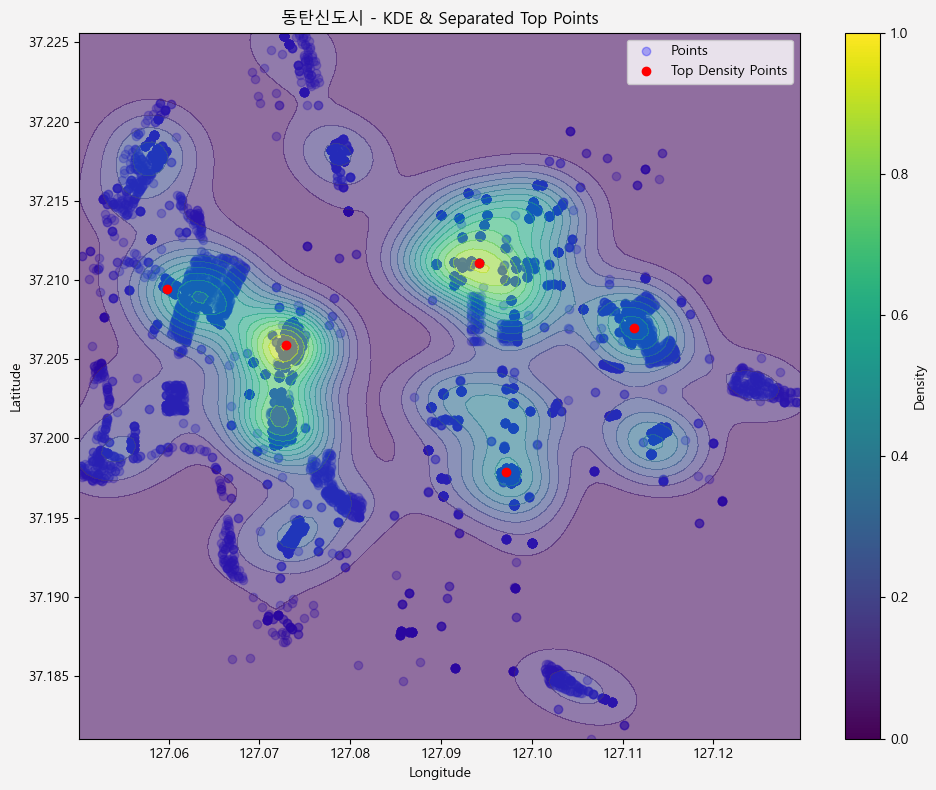


‚ñ∂ ÎØ∏ÏÇ¨Í∞ïÎ≥ÄÎèÑÏãú - top_n: 5, min_distance_km: 0.5


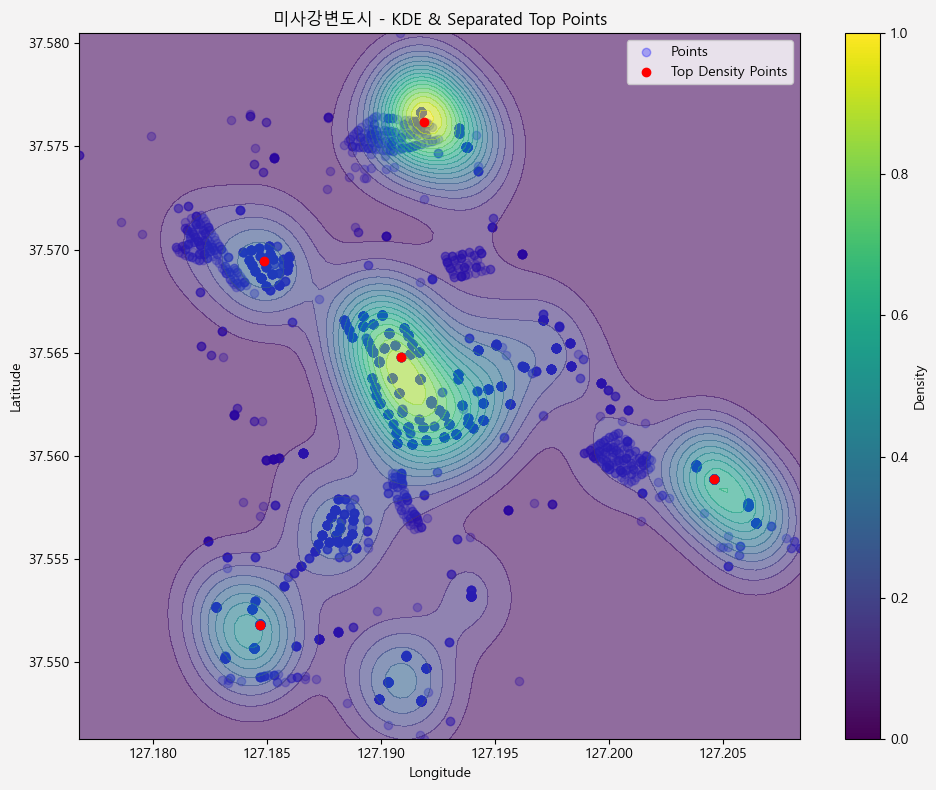


‚ñ∂ Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú - top_n: 5, min_distance_km: 0.8


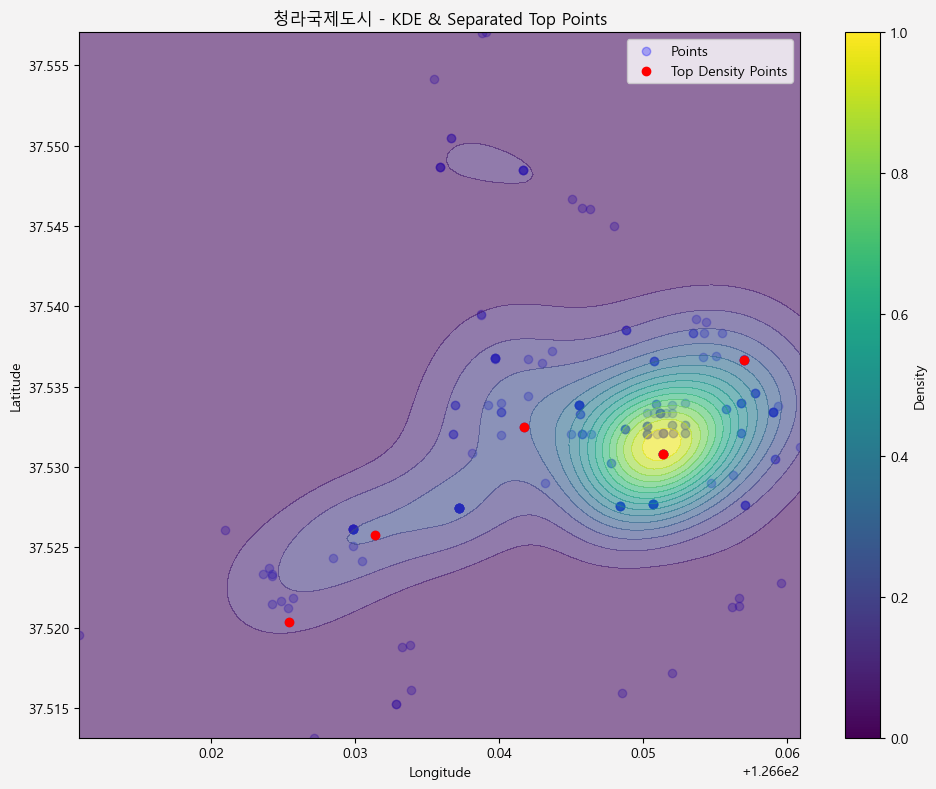

In [15]:
def find_separated_density_points(data, lon_col='lon', lat_col='lat', top_n=10, min_distance_km=1):
    coords = data[[lon_col, lat_col]].values.T  # (2, N)

    kde = gaussian_kde(coords)
    density = kde(coords)
    data = data.copy()
    data['density'] = density
    data = data.sort_values('density', ascending=False).reset_index(drop=True)

    selected_points = []
    remaining_points = data.copy()

    MAX_POINTS = 10

    while len(selected_points) < min(top_n, MAX_POINTS) and not remaining_points.empty:
        top_point = remaining_points.iloc[0]
        selected_points.append(top_point)

        remaining_points['distance'] = remaining_points.apply(
            lambda row: geodesic(
                (top_point[lat_col], top_point[lon_col]),
                (row[lat_col], row[lon_col])
            ).km,
            axis=1
        )

        remaining_points = remaining_points[remaining_points['distance'] > min_distance_km].reset_index(drop=True)

    selected_points_df = pd.DataFrame(selected_points)
    return selected_points_df, kde


def plot_separated_density_map(data, kde, top_points, region_name, lon_col='lon', lat_col='lat', resolution=100):
    x = np.linspace(data[lon_col].min(), data[lon_col].max(), resolution)
    y = np.linspace(data[lat_col].min(), data[lat_col].max(), resolution)
    X, Y = np.meshgrid(x, y)
    grid_coords = np.vstack([X.ravel(), Y.ravel()])
    Z = kde(grid_coords).reshape(X.shape)

    plt.figure(figsize=(10, 8), facecolor='#f4f3f3')
    plt.scatter(data[lon_col], data[lat_col], c='blue', alpha=0.3, label='Points')
    plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
    plt.scatter(top_points[lon_col], top_points[lat_col], color='red', label='Top Density Points')
    plt.colorbar(label='Density')
    plt.title(f'{region_name} - KDE & Separated Top Points')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def run_kde_for_all_regions(region_dfs, param_dict):
    results = {}
    for region_name, df in region_dfs.items():
        if region_name not in param_dict:
            print(f"[{region_name}] ÌååÎùºÎØ∏ÌÑ∞ ÏóÜÏùå, Ïä§ÌÇµÌï©ÎãàÎã§.")
            continue

        params = param_dict[region_name]
        top_n = params['top_n']
        min_distance = params['min_distance_km']

        print(f"\n‚ñ∂ {region_name} - top_n: {top_n}, min_distance_km: {min_distance}")
        top_points, kde = find_separated_density_points(df, top_n=top_n, min_distance_km=min_distance)
        plot_separated_density_map(df, kde, top_points, region_name)
        results[region_name] = top_points


    return results  # Í∞Å ÎèÑÏãúÎ≥ÑÎ°ú top_points Ï†ÄÏû•Îêú ÎîïÏÖîÎÑàÎ¶¨ Î∞òÌôò

# param_dict, region_dfsÎ•º Î∞îÌÉïÏúºÎ°ú Ïã§Ìñâ
all_top_points = run_kde_for_all_regions(region_dfs, param_dict)

In [16]:
for key in all_top_points:
    all_top_points[key] = all_top_points[key][['geometry']]

if 'ÎèôÌÉÑÏã†ÎèÑÏãú' in all_top_points:
    gdf = all_top_points['ÎèôÌÉÑÏã†ÎèÑÏãú']
    new_point = Point(127.10583685991182, 37.16759939599043)
    new_row = pd.DataFrame({'geometry': [new_point]})
    updated_gdf = pd.concat([gdf, new_row], ignore_index=True)
    all_top_points['ÎèôÌÉÑÏã†ÎèÑÏãú'] = updated_gdf

In [17]:
# Í∞Å Í≤©ÏûêÎ≥ÑÎ°ú Í∞ÄÏû• Í∞ÄÍπåÏö¥ Î≤àÌôîÍ∞Ä(ÏÉÅÍ∂åÎ∞ÄÏßëÏßÄ)ÍπåÏßÄÏùò Í±∞Î¶¨ Íµ¨ÌïòÍ∏∞
# Í≤©Ïûê Ï§ëÏã¨Ï†ê Ï¢åÌëú Ï∂îÏ∂ú
grid_result = grid_result.copy()
grid_result['centroid'] = grid_result['geometry'].centroid
grid_result['centroid_coords'] = grid_result['centroid'].apply(lambda p: (p.y, p.x))  # (lat, lon)

# Î≤àÌôîÍ∞Ä Ï§ëÏã¨Ï†ê Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú (Î™®Îì† ÏßÄÏó≠ ÌÜµÌï© Í∏∞Ï§Ä)
# all_top_pointsÎäî {'ÎèÑÏãúÎ™Ö': DataFrame} ÌòïÌÉúÎùºÍ≥† Í∞ÄÏ†ï
all_points = []
for df in all_top_points.values():
    if 'geometry' in df.columns:
        all_points.extend([(p.y, p.x) for p in df['geometry']])
    else:
        all_points.extend(list(zip(df['lat'], df['lon'])))

# Í∞ÄÏû• Í∞ÄÍπåÏö¥ Î≤àÌôîÍ∞ÄÍπåÏßÄÏùò Í±∞Î¶¨ Í≥ÑÏÇ∞ Ìï®Ïàò
def min_dist_to_hotspot(coord):
    return min([geodesic(coord, hotspot).km for hotspot in all_points])

# Í±∞Î¶¨ Í≥ÑÏÇ∞
grid_result['dist_to_hotspot_km'] = grid_result['centroid_coords'].progress_apply(min_dist_to_hotspot)
grid_result.drop(columns=['centroid', 'centroid_coords'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4312\3120526370.py:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6963/6963 [00:44<00:00, 156.87it/s]


#### ÏÇ∞ÏóÖÏ≤¥ Îãπ Ï¢ÖÏÇ¨ÏûêÏàò

In [18]:
grid1 = pd.read_csv('SBJ_2504_001/_census_reqdoc_1749700802742/2022ÎÖÑ_ÏÇ¨ÏóÖÏ≤¥_Îã§Î∞î_100M.txt', sep="^", header=None, names=['year', 'grid_cd', 'bn_cd', 'cnt'])
grid2 = pd.read_csv('SBJ_2504_001/_census_reqdoc_1749700802742/2022ÎÖÑ_ÏÇ¨ÏóÖÏ≤¥_Îã§ÏÇ¨_100M.txt', sep="^", header=None, names=['year', 'grid_cd', 'bn_cd', 'cnt'])
grid3 = pd.read_csv('SBJ_2504_001/_census_reqdoc_1749700802742/2022ÎÖÑ_ÏÇ¨ÏóÖÏ≤¥_ÎùºÏÇ¨_100M.txt', sep="^", header=None, names=['year', 'grid_cd', 'bn_cd', 'cnt'])

grid1_w = pd.read_csv('SBJ_2504_001/_census_reqdoc_1749702002857/2022ÎÖÑ_Ï¢ÖÏÇ¨Ïûê_Îã§Î∞î_100M.txt', sep="^", header=None, names=['year', 'grid_cd', 'bw_cd', 'emp_cnt'])
grid2_w = pd.read_csv('SBJ_2504_001/_census_reqdoc_1749702002857/2022ÎÖÑ_Ï¢ÖÏÇ¨Ïûê_Îã§ÏÇ¨_100M.txt', sep="^", header=None, names=['year', 'grid_cd', 'bw_cd', 'emp_cnt'])
grid3_w = pd.read_csv('SBJ_2504_001/_census_reqdoc_1749702002857/2022ÎÖÑ_Ï¢ÖÏÇ¨Ïûê_ÎùºÏÇ¨_100M.txt', sep="^", header=None, names=['year', 'grid_cd', 'bw_cd', 'emp_cnt'])

# Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞(ÏÇ¨ÏóÖÏ≤¥)
grid_con1 = pd.concat([grid1, grid2, grid3], ignore_index=True)
grid_con1 = grid_con1[['year', 'grid_cd', 'cnt']]
grid_con1 = grid_con1.dropna()

# Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞(Ï¢ÖÏÇ¨Ïûê)
grid_con1_w = pd.concat([grid1_w, grid2_w, grid3_w], ignore_index=True)
grid_con1_w = grid_con1_w[['year', 'grid_cd', 'emp_cnt']]
grid_con1_w = grid_con1_w.dropna()

# ÌñâÏ†ïÎèôÎ≥Ñ Ï†ÑÏ≤¥ Ï¢ÖÏÇ¨Ïûê Ïàò Í≥ÑÏÇ∞ (cnt Ìï©Í≥Ñ)
total_counts  = grid_con1.groupby("grid_cd")["cnt"].sum().reset_index()
total_counts .columns = ["grid_cd", "total_bn"]

# Ï¢ÖÏÇ¨Ïûê Ïàò Îç∞Ïù¥ÌÑ∞ (dj_emp ÌôúÏö©)
total_emp_counts = grid_con1_w.groupby("grid_cd")["emp_cnt"].sum().reset_index()
total_emp_counts.columns = ["grid_cd", "total_emp"]

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (Ïò®Ïã§Í∞ÄÏä§ Í¥ÄÎ†® ÏÇ∞ÏóÖÍ≥º Ï†ÑÏ≤¥ ÏÇ¨ÏóÖÏ≤¥)
urbanization_emission_df = total_counts.merge(total_emp_counts, on="grid_cd", how="left").fillna(0)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïó∞Í≤∞ (grid_cd Í∏∞Ï§Ä)
df = urbanization_emission_df.set_index('grid_cd')
grid_result['total_emp'] = grid_result['gid'].map(df['total_emp']).fillna(0)
grid_result['total_bn']  = grid_result['gid'].map(df['total_bn']).fillna(0)

# ÏßÄÌëú Í≥ÑÏÇ∞
grid_result['ÏÇ¨ÏóÖÏ≤¥ÎãπÏ¢ÖÏÇ¨ÏûêÏàò'] = np.where(
    grid_result['total_bn'] > 0,
    grid_result['total_emp'] / grid_result['total_bn'],
    0
)
grid_result.drop(columns=['total_emp', 'total_bn'], inplace=True)
grid_result['ÏÇ¨ÏóÖÏ≤¥ÎãπÏ¢ÖÏÇ¨ÏûêÏàò'] = np.log1p(grid_result['ÏÇ¨ÏóÖÏ≤¥ÎãπÏ¢ÖÏÇ¨ÏûêÏàò'])

#### ÎèÑÏãúÏû†Ïû¨Î†•ÏßÄÌëú

In [19]:
# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/04._ÎèÑÏãúÏû†Ïû¨Î†•ÏßÄÌëú.geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
city_pot = pd.json_normalize(geojson_data['features'])
city_pot['geometry'] = city_pot['geometry.coordinates'].apply(lambda x : make_point(x))
city_pot = gpd.GeoDataFrame(city_pot, geometry='geometry')

# Ï†úÍ±∞Ìï† Ïó¥ Î¶¨Ïä§Ìä∏
drop_cols = ['type', 'properties.fid', 'properties.sido_cd', 'properties.sgg_cd', 'geometry.type', 'geometry.coordinates']
city_pot = city_pot.drop(columns=drop_cols)

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
city_pot.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in city_pot.columns
]

rename_dict = {
    'ps_01': 'Í∏∞Í∞úÎ∞úÏßÄ Ï†ëÍ∑º',
    'ps_02': 'ÏãúÍµ∞Íµ¨Ï≤≠ Ï†ëÍ∑º',
    'ps_03': 'Í≥µÍ≥µÌé∏ÏùòÏãúÏÑ§ Ï†ëÍ∑º',
    'ps_04': 'ÏßÄÏû•Î¨º ÌòÑÌô©',
    'ps_05': 'Í≥†ÏÜçÎèÑÎ°úIC Ï†ëÍ∑º',
    'ps_06': 'Í∞ÑÏÑ†ÎèÑÎ°ú Ï†ëÍ∑º',
    'ps_07': 'Ï≤†ÎèÑÏó≠ÏÇ¨ Ï†ëÍ∑º',
    'ps_08': 'Ïó¨Í∞ùÌÑ∞ÎØ∏ÎÑê Ï†ëÍ∑º',
    'ps_09': 'ÌîºÎ≥µÎ∂ÑÎ•ò',
    'ps_10': 'Ïö©ÎèÑÏßÄÏó≠',
    'ps_11': 'Ïù∏ÌóàÍ∞Ä',
    'ps_12': 'ÏßÄÏó≠ÎÇ¥ Ï¥ùÏÉùÏÇ∞',
    'ps_13': 'ÏßÄÍ∞ÄÍ≤ΩÏüÅÎ†•',
    'ps_14': 'ÏßÄÍ∞ÄÏàòÏ§Ä',
    'ps_15': 'ÏßÄÍ∞ÄÎ≥ÄÎèôÎ•†',
    'ps_16': 'Ïù∏Íµ¨Ï¶ùÍ∞êÎ•†',
    'ps_17': 'Ïù∏Íµ¨Î∞ÄÎèÑ',
    'ps_18': 'Í≤ΩÏ†úÌôúÎèôÏù∏Íµ¨Ïàò',
    'ps_19': 'ÏÑ∏ÎåÄÏ¶ùÍ∞êÎ•†',
    'ps_20': 'ÏÇ¨ÏóÖÏ≤¥Ïàò',
    'ps_21': 'Ï£ºÌÉùÎ≥¥Í∏âÎ•†',
    'ps_22': 'Îì±Î°ùÍ≥µÏû•ÌòÑÌô©',
    'ps_23': 'Íµ≠Í≥µÏú†ÏßÄ',
    'ps_24': 'ÌëúÍ≥†',
    'ps_25': 'Í≤ΩÏÇ¨ÎèÑ',
    'ps_26': 'Íµ≠ÌÜ†ÌôòÍ≤ΩÏÑ±ÌèâÍ∞Ä',
}

# Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
city_pot.rename(columns=rename_dict, inplace=True)
city_pot = city_pot[['gbn','ÏßÄÍ∞ÄÍ≤ΩÏüÅÎ†•', 'geometry']]

joined = gpd.sjoin(city_pot, grid_analyze[['gid', 'geometry']], how='inner', predicate='within')

# Í∞Å ÏßÄÌëúÎ≥ÑÎ°ú ÏßëÍ≥Ñ Î∞©Ïãù ÏßÄÏ†ï
agg_dict = {
    'ÏßÄÍ∞ÄÍ≤ΩÏüÅÎ†•': 'mean',
}

# ÏßëÍ≥Ñ ÏàòÌñâ
agg_df = joined.groupby('gid').agg(agg_dict).reset_index()

# 4. ÏßëÍ≥Ñ Í≤∞Í≥ºÎ•º grid_analyzeÏóê Î≥ëÌï©
grid_result = grid_result.merge(agg_df, on='gid', how='left').fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_4312\3715486071.py:51: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326




In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Î≥¥Í∞Ñ ÎåÄÏÉÅ Ïó¥ Î¶¨Ïä§Ìä∏
target_columns = list(agg_dict.keys())

# Í≤©Ïûê Ï§ëÏã¨Ï¢åÌëú(x, y) ÏÉùÏÑ±
grid_result = grid_result.copy()
grid_result['x'] = grid_result.geometry.centroid.x
grid_result['y'] = grid_result.geometry.centroid.y

# ÏõêÎ≥∏ Ïú†ÏßÄÌïú Î≥¥Í∞ÑÏö© Î≥µÏÇ¨Î≥∏
grid_interp = grid_result.copy()

# Ïó¥Î≥ÑÎ°ú KNN Î≥¥Í∞Ñ ÏàòÌñâ (ÏõêÎûò NaNÏù¥ÏóàÎçò Í∞íÎßå ÎåÄÏÉÅ)
for col in tqdm(target_columns):
    missing_mask = grid_result[col].isna()  # ÏõêÎ≥∏ÏóêÏÑú NaNÏù∏ Í≤ΩÏö∞Îßå ÎåÄÏÉÅÏúºÎ°ú

    if missing_mask.sum() == 0:
        continue  # Í≤∞Ï∏° ÏóÜÏúºÎ©¥ Ïä§ÌÇµ

    # ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞
    X_train = grid_interp.loc[~missing_mask, ['x', 'y']]
    y_train = grid_interp.loc[~missing_mask, col]

    # ÏòàÏ∏° ÎåÄÏÉÅ
    X_pred = grid_interp.loc[missing_mask, ['x', 'y']]

    # KNN Î≥¥Í∞Ñ
    knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
    y_pred = knn.fit(X_train, y_train).predict(X_pred)

    # ÏòàÏ∏°Í∞í Î∞òÏòÅ
    grid_interp.loc[missing_mask, col] = y_pred

# Í≤∞Í≥º Î∞òÏòÅ Î∞è Ï†ïÎ¶¨
grid_result[target_columns] = grid_interp[target_columns]
grid_result.drop(columns=['x', 'y'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4312\3202235037.py:8: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\user\AppData\Local\Temp\ipykernel_4312\3202235037.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<?, ?it/s]


#### ÏûÑÏÉÅÎèÑ

In [21]:
# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/03. ÏûÑÏÉÅÎèÑ.geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
forest = pd.json_normalize(geojson_data['features'])
forest['geometry'] = forest['geometry.coordinates'].apply(lambda x : make_pol(x))
forest = forest[forest['properties.FRTP_NM']!="Î¨¥Î¶ΩÎ™©ÏßÄ/ÎπÑÏÇ∞Î¶º"] # ÎπÑÏÇ∞Î¶º Ï†úÍ±∞
forest = gpd.GeoDataFrame(forest, geometry='geometry')

# Ï†úÍ±∞Ìï† Ïó¥ Î¶¨Ïä§Ìä∏
drop_cols = ['type', 'geometry.type', 'geometry.coordinates']
forest = forest.drop(columns=drop_cols)

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
forest.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in forest.columns
]

forest = forest[['gbn', 'geometry']]

In [22]:
# Ï¢åÌëúÍ≥Ñ ÌôïÏù∏ Î∞è ÌÜµÏùº (Î©¥Ï†Å Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ meters Îã®ÏúÑ Ìà¨ÏòÅ Ï¢åÌëúÍ≥ÑÎ°ú Î≥ÄÌôò)
forest = forest.set_crs(epsg=4326)
grid_analyze = grid_analyze.set_crs(epsg=4326)
crs_projected = 'EPSG:5181'  # Ï§ëÎ∂ÄÏõêÏ†ê(ÎØ∏ÌÑ∞ Îã®ÏúÑ)

forest_proj = forest.to_crs(crs_projected)
grid_for = grid_analyze.to_crs(crs_projected)

# Í≥µÍ∞Ñ ÍµêÏ∞® Î∂ÑÏÑù: Í≤©ÏûêÏôÄ Í≤πÏπòÎäî ÎÖπÏßÄ ÏòÅÏó≠ Íµ¨ÌïòÍ∏∞
intersection = gpd.overlay(grid_for, forest_proj, how='intersection')
intersection['green_area_m2'] = intersection['geometry'].area

# Í≤©Ïûê Ï†ÑÏ≤¥ Î©¥Ï†Å Í≥ÑÏÇ∞
grid_for['grid_area_m2'] = grid_for['geometry'].area

# ÍµêÏ∞®Îêú ÎÖπÏßÄ Î©¥Ï†ÅÏùÑ Í≤©ÏûêÎ≥ÑÎ°ú Ìï©ÏÇ∞
green_by_grid = (
    intersection
    .groupby('gid')[['green_area_m2']]
    .sum()
    .reset_index()
)

# Í≤©Ïûê Ï†ÑÏ≤¥ Î©¥Ï†ÅÍ≥º Î≥ëÌï©
grid_for = grid_for.merge(green_by_grid, on='gid', how='left')
grid_for['green_area_m2'] = grid_for['green_area_m2'].fillna(0)

# ‚úÖ ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú ÌÅ∞ Î©¥Ï†Å Ï°∞Ï†ï: ÎÖπÏßÄ Î©¥Ï†Å > Í≤©Ïûê Î©¥Ï†ÅÏù∏ Í≤ΩÏö∞
grid_for.loc[
    grid_for['green_area_m2'] > grid_for['grid_area_m2'],
    'green_area_m2'
] = grid_for['grid_area_m2']

grid_for = grid_for[['gbn', 'gid', 'geometry', 'grid_area_m2', 'green_area_m2']]

#### ÌÉÑÏÜåÌù°ÏàòÎüâ

In [23]:
# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/16._ÌÉÑÏÜåÌù°ÏàòÎüâ_ÏÇ∞Î¶ºÎ∂ÄÎ¨∏.geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
absorption = pd.json_normalize(geojson_data['features'])
absorption['geometry'] = absorption['geometry.coordinates'].apply(lambda x : make_pol(x))

# Ï†úÍ±∞Ìï† Ïó¥ Î¶¨Ïä§Ìä∏
drop_cols = ['type', 'geometry.type', 'geometry.coordinates']
absorption = absorption.drop(columns=drop_cols)

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
absorption.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in absorption.columns
]

# Ïö∞ÏÑ† Ï†ïÎ†¨: grid_cd Í∏∞Ï§Ä + tree_tco2 ÌÅ∞ Í∞íÏù¥ Î®ºÏ†Ä Ïò§ÎèÑÎ°ù
absorption = absorption.sort_values(['grid_cd', 'tree_tco2'], ascending=[True, False])

# groupbyÌïòÏó¨ ÌÜµÌï©
absorption = (
    absorption
    .groupby('grid_cd', as_index=False)
    .agg({
        'gbn': 'first',  # tree_tco2Í∞Ä ÌÅ∞ Í∞íÏùò gbnÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞ ÏúÑÌï¥ Ï†ïÎ†¨Ìïú ÏÉÅÌÉúÏóêÏÑú first
        'tree_tco2': 'sum',
        'geometry': 'first'  # Ïñ¥Ï∞®Ìîº ÎèôÏùº
    })
)

absorption = gpd.GeoDataFrame(absorption, geometry='geometry')
absorption = absorption.rename(columns={'grid_cd': 'gid'})
absorption = absorption[['gbn', 'gid', 'geometry', 'tree_tco2']]

In [ ]:
# Îßµ Í∞ùÏ≤¥ ÏÉùÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎìú
map = KeplerGl(height=1000, width=1500)
map.add_data(data=absorption, name="Ìù°Ïàò")
map.add_data(data=grid_for, name="ÎÖπÏßÄÎπÑÏú®")

# Îßµ Ï∂úÎ†• Î∞è ÏÉÅÏÑ∏ÏÑ§Ï†ï
map

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# gid Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
merged_df = pd.merge(grid_for, absorption[['gid', 'tree_tco2']], on='gid', how='left')

# ÎπÑÏ†ïÏÉÅ Í≤©Ïûê: ÎÖπÏßÄ Î©¥Ï†Å 0Ïù∏Îç∞ ÌÉÑÏÜå Ìù°ÏàòÎüâÏùÄ Ï°¥Ïû¨
abnormal_df = merged_df[(merged_df['green_area_m2'] == 0) & (merged_df['tree_tco2'] > 0)]

# Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞: ÌïôÏäµÏö©
train_df = merged_df[(merged_df['green_area_m2'] > 0) & (merged_df['tree_tco2'] > 0)]

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X_train = train_df[['green_area_m2']]
y_train = train_df['tree_tco2']

# Î™®Îç∏ ÌïôÏäµ
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# R¬≤ ÌôïÏù∏
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(f"R¬≤ score: {r2:.3f}")

if r2 > 0.7:
    print("ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä ÏÑ±Îä• ÏñëÌò∏ ‚Üí Ïó≠Ï∂îÏ†ï ÏàòÌñâ")

    # Ïó≠Ï∂îÏ†ï (tree_tco2 ‚Üí green_area_m2)
    # ‚Üí ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Îäî Ïó≠Ìï®ÏàòÍ∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ïó≠Ï∂îÏ†ï ÏßÅÏ†ë Î™ªÌï®
    # ‚Üí ÎåÄÏã† grid_area_m2 Î≤îÏúÑ ÎÇ¥Ïùò Í∞íÏùÑ ÌÖåÏä§Ìä∏Ìï¥ Í∞ÄÏû• Í∑ºÏÇ¨Ìïú Í∞íÏùÑ ÏÑ†ÌÉù

    def estimate_green_area(row, model, resolution=100):
        tree_tco2_target = row['tree_tco2']
        max_area = row['grid_area_m2']
        candidates = np.linspace(0, max_area, resolution).reshape(-1, 1)
        preds = model.predict(candidates)
        closest_idx = np.argmin(np.abs(preds - tree_tco2_target))
        return candidates[closest_idx][0]

    import numpy as np

    abnormal_df = abnormal_df.copy()
    abnormal_df['green_area_m2_interp'] = abnormal_df.apply(
        lambda row: estimate_green_area(row, model, resolution=200), axis=1
    )

    # Î≥¥Í∞Ñ Í≤∞Í≥º Î∞òÏòÅ
    for idx, row in abnormal_df.iterrows():
        merged_df.at[idx, 'green_area_m2'] = row['green_area_m2_interp']

else:
    print("ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÏÑ±Îä• Î∂ÄÏ°± ‚Üí Î≥¥Í∞Ñ Î≥¥Î•ò ÎòêÎäî Îã§Î•∏ ÌäπÏÑ± Ï∂îÍ∞Ä ÌïÑÏöî")

# Í≤∞Í≥º Î≥ëÌï©
for idx, row in abnormal_df.iterrows():
    merged_df.at[idx, 'green_area_m2'] = row['green_area_m2_interp']

merged_df = merged_df[['gbn', 'gid', 'geometry','green_area_m2', 'tree_tco2']]

# Î∂ÑÏÑùÎåÄÏÉÅÏßÄÏóê Îß§ÌïëÌïòÍ∏∞
grid_result = pd.merge(grid_result, merged_df[['gid', 'green_area_m2', 'tree_tco2']], on='gid', how='left')
grid_result = grid_result.rename(columns={'green_area_m2': 'ÎÖπÏßÄÎ©¥Ï†Å', 'tree_tco2': 'ÌÉÑÏÜåÌù°ÏàòÎüâ'})

R¬≤ score: 0.965
ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä ÏÑ±Îä• ÏñëÌò∏ ‚Üí Ïó≠Ï∂îÏ†ï ÏàòÌñâ


c:\Users\user\anaconda3\envs\GIS\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\user\anaconda3\envs\GIS\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\user\anaconda3\envs\GIS\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\user\anaconda3\envs\GIS\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\user\anaconda3\envs\GIS\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\user\anaconda3\envs\GIS\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not hav

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm

# Î≥¥Í∞Ñ ÎåÄÏÉÅ Ïó¥ ÏÑ†ÌÉù
target_columns = ['ÌÉÑÏÜåÌù°ÏàòÎüâ']

# Ï§ëÏã¨ Ï¢åÌëú Í≥ÑÏÇ∞
grid_result = grid_result.copy()
grid_result['x'] = grid_result.geometry.centroid.x
grid_result['y'] = grid_result.geometry.centroid.y

# Î≥µÏÇ¨Î≥∏ (Î≥¥Í∞ÑÏö©)
grid_interp = grid_result.copy()

# Ïó¥Î≥ÑÎ°ú KNN Î≥¥Í∞Ñ ÏàòÌñâ
for col in tqdm(target_columns):
    # Ïã§Ï†ú NaNÎßå Î≥¥Í∞Ñ ÎåÄÏÉÅÏúºÎ°ú ÏÇ¨Ïö©
    missing_mask = grid_interp[col].isna()
    if missing_mask.sum() == 0:
        continue

    # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ (Í≤∞Ï∏°Ïù¥ ÏïÑÎãå ÌñâÎßå)
    X_train = grid_interp.loc[~missing_mask, ['x', 'y']]
    y_train = grid_interp.loc[~missing_mask, col]

    # ÏòàÏ∏° ÎåÄÏÉÅ (Í≤∞Ï∏°Ïù∏ Ìñâ)
    X_pred = grid_interp.loc[missing_mask, ['x', 'y']]

    # KNN ÌöåÍ∑Ä Î≥¥Í∞Ñ
    knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
    y_pred = knn.fit(X_train, y_train).predict(X_pred)

    # Î≥¥Í∞ÑÍ∞í ÏÇΩÏûÖ
    grid_interp.loc[missing_mask, col] = y_pred

# Í≤∞Í≥º Î∞òÏòÅ
grid_result[target_columns] = grid_interp[target_columns]
grid_result.drop(columns=['x', 'y'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4312\1494010274.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\user\AppData\Local\Temp\ipykernel_4312\1494010274.py:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 675.52it/s]


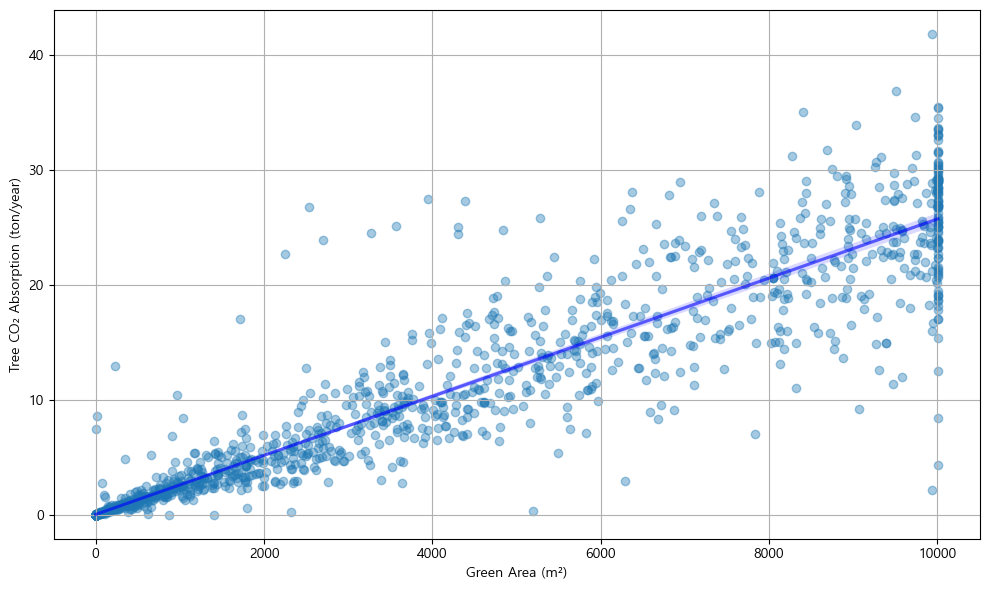

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.regplot(
    data=grid_result,
    x='ÎÖπÏßÄÎ©¥Ï†Å',
    y='ÌÉÑÏÜåÌù°ÏàòÎüâ',
    line_kws={"alpha": 0.6, "color": 'blue'},   # ÌöåÍ∑ÄÏÑ† ÏÉâÏÉÅ
    scatter_kws={"alpha": 0.4},   # ÏÇ∞Ï†êÎèÑ Ìà¨Î™ÖÎèÑ
    ci=95,                       # Ïã†Î¢∞ Íµ¨Í∞ÑÏùÑ 95%Î°ú ÏÑ§Ï†ï
    color='#1f78b4',                 # Ïã†Î¢∞ Íµ¨Í∞Ñ ÏÉâÏÉÅ ÏÑ§Ï†ï
)

plt.xlabel('Green Area (m¬≤)')
plt.ylabel('Tree CO‚ÇÇ Absorption (ton/year)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ

In [26]:
# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/12._ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_Ï†ÑÍ∏∞Î∂ÄÎ¨∏.geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
emission_elec = pd.json_normalize(geojson_data['features'])
emission_elec['geometry'] = emission_elec['geometry.coordinates'].apply(lambda x : make_pol(x))

# Ï†úÍ±∞Ìï† Ïó¥ Î¶¨Ïä§Ìä∏
drop_cols = ['type', 'geometry.type', 'geometry.coordinates']
emission_elec = emission_elec.drop(columns=drop_cols)

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
emission_elec.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in emission_elec.columns
]

# Ïö∞ÏÑ† Ï†ïÎ†¨: grid_cd Í∏∞Ï§Ä + e_tot ÌÅ∞ Í∞í Ïö∞ÏÑ†
emission_elec = emission_elec.sort_values(['grid_cd', 'e_tot'], ascending=[True, False])

# Ïà´Ïûê Ïª¨Îüº Î™©Î°ù Ï†ïÏùò (Ïó¥ Ïù¥Î¶Ñ ÏûêÎèô Ï∂îÏ∂ú Í∞ÄÎä•)
value_cols = [col for col in emission_elec.columns if col.startswith('e_')]

# groupbyÌïòÏó¨ Î≥ëÌï©
emission_elec = (
    emission_elec
    .groupby('grid_cd', as_index=False)
    .agg({
        'gbn': 'first',  # e_tot ÌÅ∞ Í∞í Í∏∞Ï§ÄÏúºÎ°ú gbn ÏÑ†ÌÉù
        'geometry': 'first',  # ÎèôÏùºÌïòÎØÄÎ°ú ÏïÑÎ¨¥Í±∞ÎÇò
        **{col: 'sum' for col in value_cols}  # ÌÉÑÏÜåÎ∞∞Ï∂úÎüâÏùÄ Ï†ÑÎ∂Ä Ìï©ÏÇ∞
    })
)
emission_elec = gpd.GeoDataFrame(emission_elec, geometry='geometry')
emission_elec = emission_elec.rename(columns={'grid_cd': 'gid', 'e_tot': 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)'})
emission_elec = emission_elec[['gbn', 'gid', 'geometry', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)']]

# grid_resultÏóê Î≥ëÌï© (gid Í∏∞Ï§Ä, Ï¢åÏ∏°Ï°∞Ïù∏)
grid_result = grid_result.merge(
    emission_elec[['gid', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)']],
    on='gid',
    how='left'
)

# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/13._ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_Í∞ÄÏä§Î∂ÄÎ¨∏.geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
emission_gas = pd.json_normalize(geojson_data['features'])
emission_gas['geometry'] = emission_gas['geometry.coordinates'].apply(lambda x : make_pol(x))

# Ï†úÍ±∞Ìï† Ïó¥ Î¶¨Ïä§Ìä∏
drop_cols = ['type', 'geometry.type', 'geometry.coordinates']
emission_gas = emission_gas.drop(columns=drop_cols)

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
emission_gas.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in emission_gas.columns
]

# Ïö∞ÏÑ† Ï†ïÎ†¨: grid_cd Í∏∞Ï§Ä + g_tot ÌÅ∞ Í∞í Ïö∞ÏÑ†
emission_gas = emission_gas.sort_values(['grid_cd', 'g_tot'], ascending=[True, False])

# Ïà´Ïûê Ïª¨Îüº Î™©Î°ù Ï†ïÏùò (Ïó¥ Ïù¥Î¶Ñ ÏûêÎèô Ï∂îÏ∂ú Í∞ÄÎä•)
value_cols = [col for col in emission_gas.columns if col.startswith('g_')]

# groupbyÌïòÏó¨ Î≥ëÌï©
emission_gas = (
    emission_gas
    .groupby('grid_cd', as_index=False)
    .agg({
        'gbn': 'first',  # g_tot ÌÅ∞ Í∞í Í∏∞Ï§ÄÏúºÎ°ú gbn ÏÑ†ÌÉù
        'geometry': 'first',  # ÎèôÏùºÌïòÎØÄÎ°ú ÏïÑÎ¨¥Í±∞ÎÇò
        **{col: 'sum' for col in value_cols}  # ÌÉÑÏÜåÎ∞∞Ï∂úÎüâÏùÄ Ï†ÑÎ∂Ä Ìï©ÏÇ∞
    })
)
emission_gas = gpd.GeoDataFrame(emission_gas, geometry='geometry')
emission_gas = emission_gas.rename(columns={'grid_cd': 'gid', 'g_tot': 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)'})
emission_gas = emission_gas[['gbn', 'gid', 'geometry', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)']]

# grid_resultÏóê Î≥ëÌï© (gid Í∏∞Ï§Ä, Ï¢åÏ∏°Ï°∞Ïù∏)
grid_result = grid_result.merge(
    emission_gas[['gid', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)']],
    on='gid',
    how='left'
)

# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/14._ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_ÎÇúÎ∞©Î∂ÄÎ¨∏.geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
emission_heat = pd.json_normalize(geojson_data['features'])
emission_heat['geometry'] = emission_heat['geometry.coordinates'].apply(lambda x : make_pol(x))

# Ï†úÍ±∞Ìï† Ïó¥ Î¶¨Ïä§Ìä∏
drop_cols = ['type', 'geometry.type', 'geometry.coordinates']
emission_heat = emission_heat.drop(columns=drop_cols)

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
emission_heat.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in emission_heat.columns
]

# Ïö∞ÏÑ† Ï†ïÎ†¨: grid_cd Í∏∞Ï§Ä + h_tot ÌÅ∞ Í∞í Ïö∞ÏÑ†
emission_heat = emission_heat.sort_values(['grid_cd', 'h_tot'], ascending=[True, False])

# Ïà´Ïûê Ïª¨Îüº Î™©Î°ù Ï†ïÏùò (Ïó¥ Ïù¥Î¶Ñ ÏûêÎèô Ï∂îÏ∂ú Í∞ÄÎä•)
value_cols = [col for col in emission_heat.columns if col.startswith('h_')]

# groupbyÌïòÏó¨ Î≥ëÌï©
emission_heat = (
    emission_heat
    .groupby('grid_cd', as_index=False)
    .agg({
        'gbn': 'first',  # h_tot ÌÅ∞ Í∞í Í∏∞Ï§ÄÏúºÎ°ú gbn ÏÑ†ÌÉù
        'geometry': 'first',  # ÎèôÏùºÌïòÎØÄÎ°ú ÏïÑÎ¨¥Í±∞ÎÇò
        **{col: 'sum' for col in value_cols}  # ÌÉÑÏÜåÎ∞∞Ï∂úÎüâÏùÄ Ï†ÑÎ∂Ä Ìï©ÏÇ∞
    })
)
emission_heat = gpd.GeoDataFrame(emission_heat, geometry='geometry')
emission_heat = emission_heat.rename(columns={'grid_cd': 'gid', 'h_tot': 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)'})
emission_heat = emission_heat[['gbn', 'gid', 'geometry', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)']]

# grid_resultÏóê Î≥ëÌï© (gid Í∏∞Ï§Ä, Ï¢åÏ∏°Ï°∞Ïù∏)
grid_result = grid_result.merge(
    emission_heat[['gid', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)']],
    on='gid',
    how='left'
)

In [27]:
# GeoJSON ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
with open('SBJ_2504_001/15._ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_ÏàòÏÜ°Î∂ÄÎ¨∏.geojson', encoding="UTF8") as geojson_file:
    geojson_data = json.load(geojson_file)
emission_transport = pd.json_normalize(geojson_data['features'])
emission_transport['geometry'] = emission_transport['geometry.coordinates'].apply(lambda x : make_pol(x))

# Ï†úÍ±∞Ìï† Ïó¥ Î¶¨Ïä§Ìä∏
drop_cols = ['type', 'geometry.type', 'geometry.coordinates']
emission_transport = emission_transport.drop(columns=drop_cols)

# 'properties.' Ï†ëÎëêÏÇ¨ Ï†úÍ±∞
emission_transport.columns = [
    col.replace('properties.', '') if col.startswith('properties.') else col
    for col in emission_transport.columns
]

# Ïö∞ÏÑ† Ï†ïÎ†¨: grid_cd Í∏∞Ï§Ä + road_tco2 ÌÅ∞ Í∞íÏù¥ Î®ºÏ†Ä Ïò§ÎèÑÎ°ù
emission_transport = emission_transport.sort_values(['grid_cd', 'road_tco2'], ascending=[True, False])

# groupbyÌïòÏó¨ ÌÜµÌï©
emission_transport = (
    emission_transport
    .groupby('grid_cd', as_index=False)
    .agg({
        'gbn': 'first',  # road_tco2Í∞Ä ÌÅ∞ Í∞íÏùò gbnÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞ ÏúÑÌï¥ Ï†ïÎ†¨Ìïú ÏÉÅÌÉúÏóêÏÑú first
        'road_tco2': 'sum',
        'geometry': 'first'  # Ïñ¥Ï∞®Ìîº ÎèôÏùº
    })
)

emission_transport = gpd.GeoDataFrame(emission_transport, geometry='geometry')
emission_transport = emission_transport.rename(columns={'grid_cd': 'gid', 'road_tco2': 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)'})
emission_transport = emission_transport[['gbn', 'gid', 'geometry', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)']]

# grid_resultÏóê Î≥ëÌï© (gid Í∏∞Ï§Ä, Ï¢åÏ∏°Ï°∞Ïù∏)
grid_result = grid_result.merge(
    emission_transport[['gid', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)']],
    on='gid',
    how='left'
)

In [ ]:
grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)'] = np.log1p(grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)'])
grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)'] = np.log1p(grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)'])
grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)'] = np.log1p(grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)'])
grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)'] = np.log1p(grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)'])

In [61]:
cols = ['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)', 'ÌÉÑÏÜåÌù°ÏàòÎüâ']
corr_matrix = grid_result[cols].corr()

print(corr_matrix)

           ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)  ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)  ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)  ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)     ÌÉÑÏÜåÌù°ÏàòÎüâ
ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)   1.000000   0.611038   0.254734  -0.039230 -0.080988
ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)   0.611038   1.000000   0.549696   0.045600 -0.134621
ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)   0.254734   0.549696   1.000000  -0.005009 -0.097519
ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)  -0.039230   0.045600  -0.005009   1.000000 -0.231557
ÌÉÑÏÜåÌù°ÏàòÎüâ      -0.080988  -0.134621  -0.097519  -0.231557  1.000000


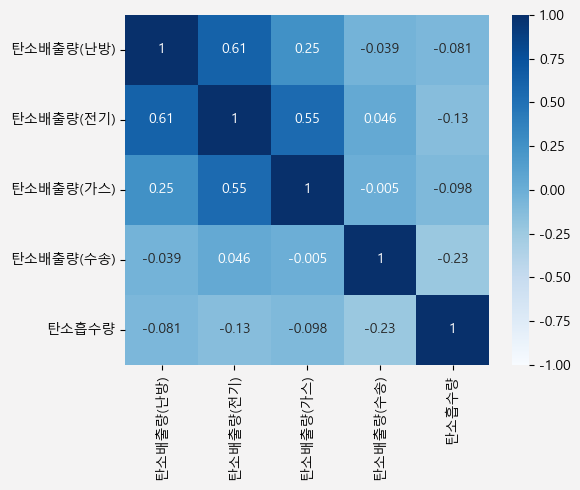

In [62]:
# ÏÉà figureÏôÄ axes ÏÉùÏÑ±, Î∞∞Í≤ΩÏÉâ ÏßÄÏ†ï
fig, ax = plt.subplots(figsize=(6, 5))
fig.patch.set_facecolor('#f4f3f3')  # Ï†ÑÏ≤¥ Î∞∞Í≤ΩÏÉâ
ax.set_facecolor('#f4f3f3')         # ÌûàÌä∏Îßµ ÎÇ¥Î∂Ä Î∞∞Í≤ΩÏÉâ

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    vmin=-1,
    vmax=1,
    ax=ax
)

plt.tight_layout()
plt.show()

In [37]:
# Îßµ Í∞ùÏ≤¥ ÏÉùÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎìú
map = KeplerGl(height=1000, width=1500)
map.add_data(data=roadsystem_df, name="Ï£ºÏöî ÎèÑÎ°úÎßù")
map.add_data(data=detail_roadsystem_df, name="ÏÉÅÏÑ∏ ÎèÑÎ°úÎßù")
map.add_data(data=areaplan_analysis, name="ÌÜ†ÏßÄÏù¥Ïö©Í≥ÑÌöç")
map.add_data(data=grid_result, name="ÏöîÏù∏")

# Îßµ Ï∂úÎ†• Î∞è ÏÉÅÏÑ∏ÏÑ§Ï†ï
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


c:\Users\user\anaconda3\envs\GIS\lib\site-packages\jupyter_client\session.py:719: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



KeplerGl(data={'Ï£ºÏöî ÎèÑÎ°úÎßù': {'index': [2924, 2925, 1967, 1972, 1979, 1965, 1977, 1971, 2556, 3092, 2930, 2931, 29‚Ä¶

In [63]:
grid_result["ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)"] = (
    grid_result["ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)"] +
    grid_result["ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)"] +
    grid_result["ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)"]
)
grid_result.drop(columns=["ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Ï†ÑÍ∏∞)", "ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(Í∞ÄÏä§)", "ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÎÇúÎ∞©)"], inplace=True)

# Log Scale Î≥ÄÌôò
grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)'] = np.log1p(grid_result['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)'])

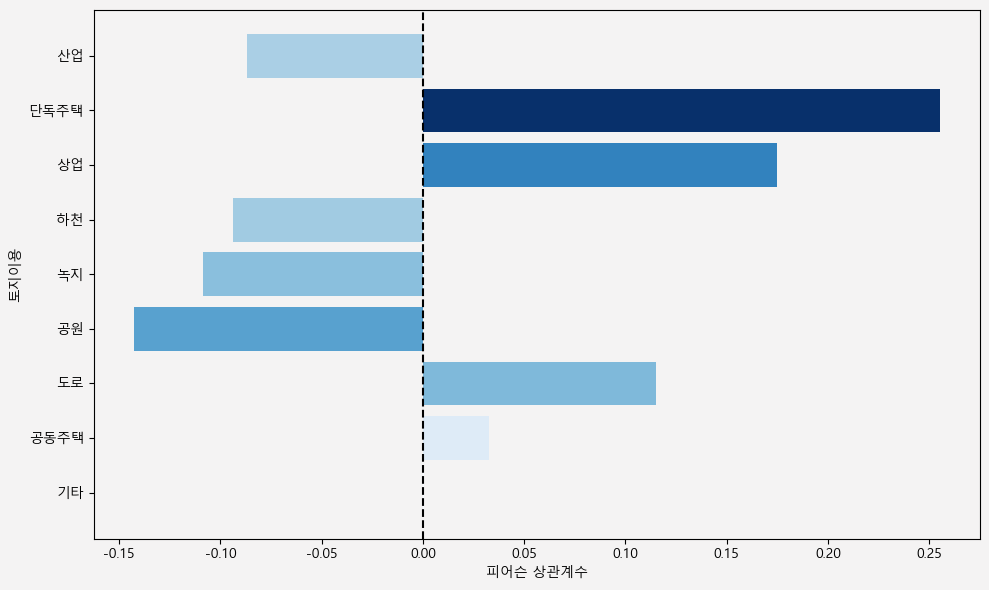

In [71]:
# Í¥ÄÏã¨ Ïó¥
land_cols = ['Í∏∞ÌÉÄ', 'Í≥µÎèôÏ£ºÌÉù', 'ÎèÑÎ°ú', 'Í≥µÏõê', 'ÎÖπÏßÄ', 'ÌïòÏ≤ú', 'ÏÉÅÏóÖ', 'Îã®ÎèÖÏ£ºÌÉù', 'ÏÇ∞ÏóÖ']
target_col = 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)'

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_series = grid_result[land_cols].corrwith(grid_result[target_col], method='pearson')

# Ï†àÎåìÍ∞í Í∏∞Î∞òÏúºÎ°ú ÏÉâÏÉÅ ÏßÑÌïòÍ∏∞ Ï°∞Ï†ï (ÌååÎûÄÏÉâ Í≥ÑÏó¥)
abs_corr = corr_series.abs()
norm = (abs_corr - abs_corr.min()) / (abs_corr.max() - abs_corr.min() + 1e-9)  # 0~1Î°ú Ï†ïÍ∑úÌôî
colors = [plt.cm.Blues(v) for v in norm]  # ÏßÑÌïú ÌååÎûÄÏÉâÏùºÏàòÎ°ù ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÌÅº

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#f4f3f3')  # Ï†ÑÏ≤¥ Î∞∞Í≤Ω
ax.set_facecolor('#f4f3f3')         # plot ÎÇ¥Î∂Ä Î∞∞Í≤Ω

bars = ax.barh(corr_series.index, corr_series.values, color=colors)
ax.set_xlabel('ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò')
ax.set_ylabel('ÌÜ†ÏßÄÏù¥Ïö©')
ax.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

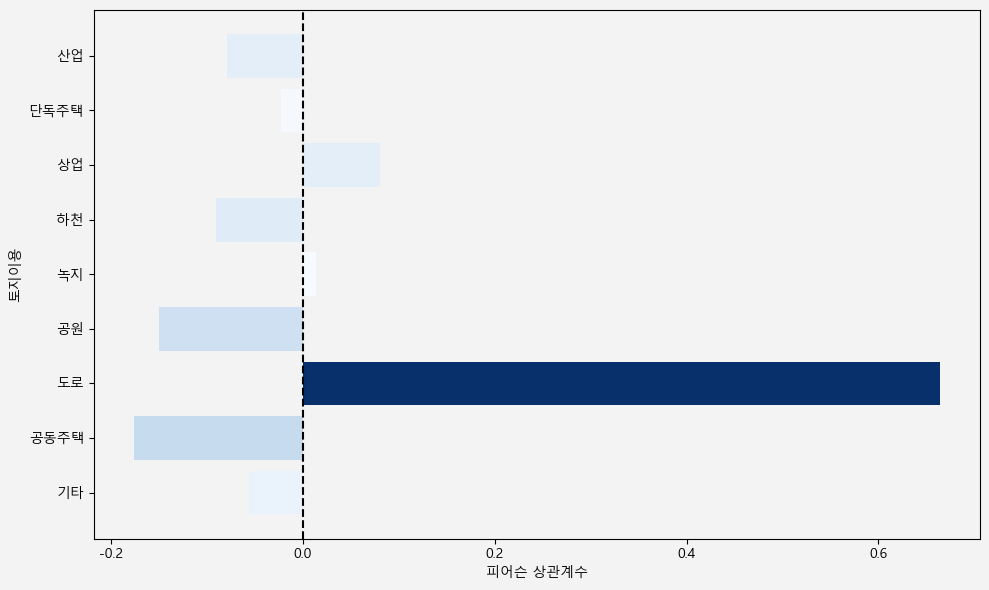

In [ ]:
# Í¥ÄÏã¨ Ïó¥
land_cols = ['Í∏∞ÌÉÄ', 'Í≥µÎèôÏ£ºÌÉù', 'ÎèÑÎ°ú', 'Í≥µÏõê', 'ÎÖπÏßÄ', 'ÌïòÏ≤ú', 'ÏÉÅÏóÖ', 'Îã®ÎèÖÏ£ºÌÉù', 'ÏÇ∞ÏóÖ']
target_col = 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)'

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_series = grid_result[land_cols].corrwith(grid_result[target_col], method='pearson')

# Ï†àÎåìÍ∞í Í∏∞Î∞òÏúºÎ°ú ÏÉâÏÉÅ ÏßÑÌïòÍ∏∞ Ï°∞Ï†ï (ÌååÎûÄÏÉâ Í≥ÑÏó¥)
abs_corr = corr_series.abs()
norm = (abs_corr - abs_corr.min()) / (abs_corr.max() - abs_corr.min() + 1e-9)  # 0~1Î°ú Ï†ïÍ∑úÌôî
colors = [plt.cm.Blues(v) for v in norm]  # ÏßÑÌïú ÌååÎûÄÏÉâÏùºÏàòÎ°ù ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÌÅº

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#f4f3f3')  # Ï†ÑÏ≤¥ Î∞∞Í≤Ω
ax.set_facecolor('#f4f3f3')         # plot ÎÇ¥Î∂Ä Î∞∞Í≤Ω

bars = ax.barh(corr_series.index, corr_series.values, color=colors)
ax.set_xlabel('ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò')
ax.set_ylabel('ÌÜ†ÏßÄÏù¥Ïö©')
ax.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

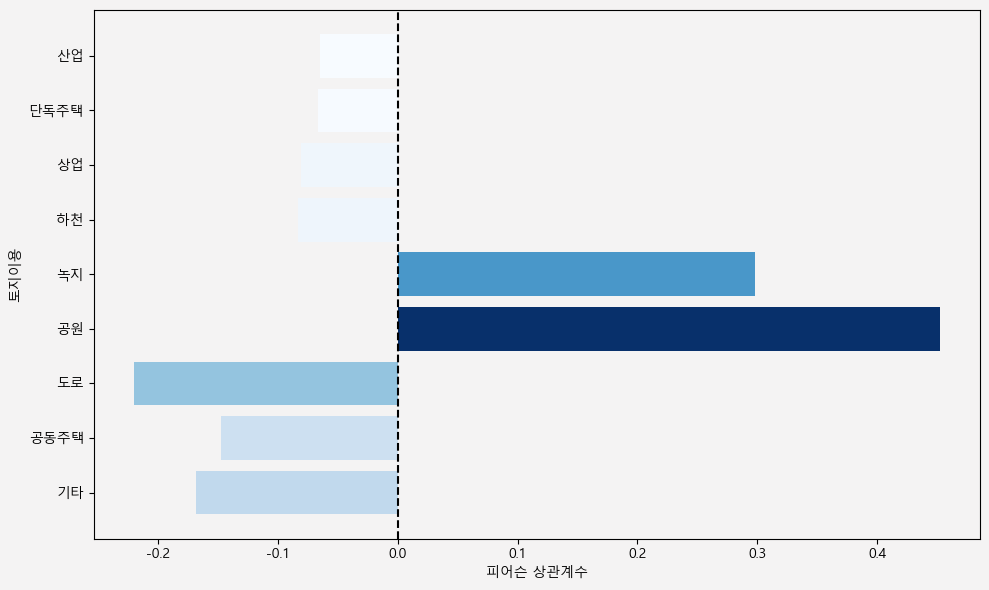

In [73]:
# Í¥ÄÏã¨ Ïó¥
land_cols = ['Í∏∞ÌÉÄ', 'Í≥µÎèôÏ£ºÌÉù', 'ÎèÑÎ°ú', 'Í≥µÏõê', 'ÎÖπÏßÄ', 'ÌïòÏ≤ú', 'ÏÉÅÏóÖ', 'Îã®ÎèÖÏ£ºÌÉù', 'ÏÇ∞ÏóÖ']
target_col = 'ÌÉÑÏÜåÌù°ÏàòÎüâ'

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_series = grid_result[land_cols].corrwith(grid_result[target_col], method='pearson')

# Ï†àÎåìÍ∞í Í∏∞Î∞òÏúºÎ°ú ÏÉâÏÉÅ ÏßÑÌïòÍ∏∞ Ï°∞Ï†ï (ÌååÎûÄÏÉâ Í≥ÑÏó¥)
abs_corr = corr_series.abs()
norm = (abs_corr - abs_corr.min()) / (abs_corr.max() - abs_corr.min() + 1e-9)  # 0~1Î°ú Ï†ïÍ∑úÌôî
colors = [plt.cm.Blues(v) for v in norm]  # ÏßÑÌïú ÌååÎûÄÏÉâÏùºÏàòÎ°ù ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÌÅº

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#f4f3f3')  # Ï†ÑÏ≤¥ Î∞∞Í≤Ω
ax.set_facecolor('#f4f3f3')         # plot ÎÇ¥Î∂Ä Î∞∞Í≤Ω

bars = ax.barh(corr_series.index, corr_series.values, color=colors)
ax.set_xlabel('ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò')
ax.set_ylabel('ÌÜ†ÏßÄÏù¥Ïö©')
ax.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [112]:
# Îßµ Í∞ùÏ≤¥ ÏÉùÏÑ± Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎìú
map = KeplerGl(height=1000, width=1500)
map.add_data(data=roadsystem_df, name="Ï£ºÏöî ÎèÑÎ°úÎßù")
map.add_data(data=detail_roadsystem_df, name="ÏÉÅÏÑ∏ ÎèÑÎ°úÎßù")
map.add_data(data=areaplan_analysis, name="ÌÜ†ÏßÄÏù¥Ïö©Í≥ÑÌöç")
map.add_data(data=grid_result, name="ÏöîÏù∏")

# Îßµ Ï∂úÎ†• Î∞è ÏÉÅÏÑ∏ÏÑ§Ï†ï
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Ï£ºÏöî ÎèÑÎ°úÎßù': {'index': [2924, 2925, 1967, 1972, 1979, 1965, 1977, 1971, 2556, 3092, 2930, 2931, 29‚Ä¶

#### ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

In [ ]:
# ÎåÄÏÉÅ Î≥ÄÏàò Î™©Î°ù
target_vars = ['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)', 'ÌÉÑÏÜåÌù°ÏàòÎüâ']

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3), facecolor='#f4f3f3')
# ÏãúÍ∞ÅÌôî

for i, var in enumerate(target_vars):
    # Ïù¥ÏÉÅÍ∞í Ï†úÏô∏
    filtered_data = grid_result[
        ~(
            #((grid_result['Í±∞Ï£ºÏù∏Íµ¨'] == 0) & (grid_result[var] > 0)) |
            ((grid_result['Í±∞Ï£ºÏù∏Íµ¨'] > 0) & (grid_result[var] == 0))
        )
    ]

    ax = axes[i]
    ax.set_facecolor('#f4f3f3')  # ÌîåÎ°Ø ÏòÅÏó≠ Î∞∞Í≤ΩÏÉâ
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr = grid_result['Í∏∞ÌÉÄ'].corr(grid_result[var])
    print(f"ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.3f}")
    
    sns.regplot(
        data=grid_result,
        x='Í∏∞ÌÉÄ',
        y=var,
        ax=ax,
        line_kws={"alpha": 0.6, "color": 'blue'},
        scatter_kws={"alpha": 0.4},
        ci=95,
        color='#1f78b4'
    )
    
    ax.set_xlabel('Í∏∞ÌÉÄ')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

## ÍµêÌÜµÍ¥ÄÎ†® Î∂ÑÏÑù

#### DRT(ÏàòÏöîÏùëÎãµÌòï ÍµêÌÜµÏ≤¥Í≥Ñ) Ïö¥ÌñâÍ∏∞Î°ù ÌÜµÍ≥Ñ

In [74]:
DRT_using = pd.read_csv('SBJ_2504_001/23._DRT_Ïö¥ÌñâÍ∏∞Î°ùÌÜµÍ≥Ñ.csv')

# Ï∂úÎ∞úÏßÄ Í∏∞Ï§Ä ÏßëÍ≥Ñ
dep_scores = DRT_using.groupby('dep_gid').agg({
    'service_cnt': 'sum',
    'service_tm': 'sum'
}).rename(columns={'service_cnt': 'dep_cnt', 'service_tm': 'dep_tm'})

# ÎèÑÏ∞©ÏßÄ Í∏∞Ï§Ä ÏßëÍ≥Ñ
arr_scores = DRT_using.groupby('arr_gid').agg({
    'service_cnt': 'sum',
    'service_tm': 'sum'
}).rename(columns={'service_cnt': 'arr_cnt', 'service_tm': 'arr_tm'})

# Í≤©ÏûêÎ≥Ñ ÌÜµÌï©
drt_score = dep_scores.join(arr_scores, how='outer')
drt_score = drt_score.fillna(0)

# Ï†êÏàò Í≥ÑÏÇ∞ Í≥µÏãù (Í∞ÄÏ§ëÏπò Ï°∞Ï†ï Í∞ÄÎä•)
drt_score['DRTÌôúÏö©Ï†êÏàò'] = (
    drt_score['dep_cnt'] * 1.0 +
    drt_score['arr_cnt'] * 0.7 +
    drt_score['dep_tm'] * 0.0001 +
    drt_score['arr_tm'] * 0.00005
)

# DRT ÌôúÏö©Ï†êÏàò Í≥ÑÏÇ∞
drt_score = drt_score.reset_index().rename(columns={'dep_gid': 'gid'})
grid_result = grid_result.merge(drt_score[['gid', 'DRTÌôúÏö©Ï†êÏàò']], on='gid', how='left')
grid_result['DRTÌôúÏö©Ï†êÏàò'] = grid_result['DRTÌôúÏö©Ï†êÏàò'].fillna(0)

#### ÎèÑÎ°úÎßùÏóê Í¥ÄÎ†®Îç∞Ïù¥ÌÑ∞ Îß§Ìïë

In [29]:
# ÎèÑÎ°ú idÏôÄ geometryÎ•º Îß§ÌïëÌïú ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ± : Ï∂îÏ†ïÍµêÌÜµÎüâ dataÏôÄ Îß§Ìïë ÏòàÏ†ï
road_geo_dic = dict(zip(roadsystem_df['link_id'], roadsystem_df['geometry']))
# ÎèÑÎ°ú idÏôÄ lanesÎ•º Îß§ÌïëÌïú ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
road_lanes_dic = dict(zip(roadsystem_df['link_id'], roadsystem_df['lane']))
# ÎèÑÎ°ú idÏôÄ fnode_idÎ•º Îß§ÌïëÌïú ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
road_fnode_dic = dict(zip(roadsystem_df['link_id'], roadsystem_df['fnode_id']))
# ÎèÑÎ°ú idÏôÄ tnode_idÎ•º Îß§ÌïëÌïú ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
road_tnode_dic = dict(zip(roadsystem_df['link_id'], roadsystem_df['tnode_id']))

#ÌòºÏû° ÎπàÎèÑ & ÏãúÍ∞Ñ Í∞ïÎèÑ Îß§Ìïë
con_fre = pd.read_csv('SBJ_2504_001/19._ÌòºÏû°ÎπàÎèÑÍ∞ïÎèÑ.csv')
con_fre['link_id'] = con_fre['link_id'].astype(str)
road_con_fre_dic = dict(zip(con_fre['link_id'], con_fre['FRIN_CG']))

con_tm = pd.read_csv('SBJ_2504_001/20._ÌòºÏû°ÏãúÍ∞ÑÍ∞ïÎèÑ.csv')
con_tm['link_id'] = con_tm['link_id'].astype(str)
road_con_tm_dic = dict(zip(con_tm['link_id'], con_tm['TI_CG']))

#ÌèâÍ∑†ÏÜçÎèÑ Îß§Ìïë
aver_vel = pd.read_csv('SBJ_2504_001/33._ÌèâÍ∑†ÏÜçÎèÑ.csv')
aver_vel = aver_vel[aver_vel['timeslot'] == 'all']
aver_vel['link_id'] = aver_vel['link_id'].astype(str)
road_aver_vel_dic = dict(zip(aver_vel['link_id'], aver_vel['velocity_AVRG']))

traffic_df = pd.read_csv('SBJ_2504_001/18._Ï∂îÏ†ïÍµêÌÜµÎüâ.csv')
traffic_df['link_id'] = traffic_df['link_id'].astype(str)
traffic_df = traffic_df[traffic_df['timeslot'] == 'all'] # ÏùºÎ≥Ñ ÎàÑÏ†ÅÍµêÌÜµÎüâ ÏÇ¨Ïö©
traffic_df['lane'] = traffic_df['link_id'].map(road_lanes_dic)
traffic_df['geometry'] = traffic_df['link_id'].map(road_geo_dic)
traffic_df['fnode_id'] = traffic_df['link_id'].map(road_fnode_dic)
traffic_df['tnode_id'] = traffic_df['link_id'].map(road_tnode_dic)
traffic_df['ÌòºÏû°ÎπàÎèÑÍ∞ïÎèÑ'] = traffic_df['link_id'].map(road_con_fre_dic)
traffic_df['ÌòºÏû°ÏãúÍ∞ÑÍ∞ïÎèÑ'] = traffic_df['link_id'].map(road_con_tm_dic)
traffic_df['ÌèâÍ∑†ÏÜçÎèÑ'] = traffic_df['link_id'].map(road_aver_vel_dic)
traffic_df = gpd.GeoDataFrame(traffic_df, geometry='geometry')
traffic_df = traffic_df.rename(columns={'road_length': 'length', 'k_length': 'length'})
traffic_df = traffic_df[['link_id', 'geometry', 'road_rank', 'road_name', 'fnode_id', 'tnode_id', 'lane', 'length', 'ALL_AADT', 'PSCR_AADT', 'BUS_AADT', 'FGCR_AADT', 'ÌòºÏû°ÎπàÎèÑÍ∞ïÎèÑ', 'ÌòºÏû°ÏãúÍ∞ÑÍ∞ïÎèÑ', 'ÌèâÍ∑†ÏÜçÎèÑ']]
traffic_df = traffic_df.dropna(subset = ['geometry']).reset_index(drop=True)

In [30]:
# ÎèÑÎ°úÎì±Í∏âÎ≥Ñ Í∏∞Ï§ÄÏö©Îüâ (ÎåÄ/Ïùº/Ï∞®Î°ú)
capacity_dict = {
    'Í≥†ÏÜçÍµ≠ÎèÑ': 2200,            # 'Í≥†ÏÜçÎèÑÎ°ú' ‚Üí Ïã§Ï†ú Îì±Í∏âÎ™Ö 'Í≥†ÏÜçÍµ≠ÎèÑ'
    'Í≥†ÏÜçÎèÑÎ°ú Ïó∞Í≤∞Îû®ÌîÑ': 1500,
    'ÎèÑÏãúÍ≥†ÏÜçÍµ≠ÎèÑ': 2000,        # 'ÎèÑÏãúÍ≥†ÏÜçÎèÑÎ°ú' ‚Üí Ïã§Ï†ú Îì±Í∏âÎ™Ö 'ÎèÑÏãúÍ≥†ÏÜçÍµ≠ÎèÑ'
    'ÏùºÎ∞òÍµ≠ÎèÑ': 2000,
    'ÏßÄÎ∞©ÎèÑ': 1600,
    'ÏãúÍµ∞ÎèÑ': 1200,
    'ÌäπÎ≥ÑÍ¥ëÏó≠ÏãúÎèÑ': 1500,
    'Íµ≠Í∞ÄÏßÄÏõêÏßÄÎ∞©ÎèÑ': 1800      # Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Ïö©Îüâ Î∞∞Ï†ï
}

# Í∏∞Ï§ÄÏö©Îüâ Îß§Ìïë
traffic_df['Í∏∞Ï§ÄÏö©Îüâ'] = traffic_df['road_rank'].map(capacity_dict).fillna(1500)

# ÌòºÏû°ÎèÑ Í≥ÑÏÇ∞
traffic_df['ÌòºÏû°ÎèÑ'] = traffic_df['ALL_AADT'] / (
    traffic_df['lane'] * traffic_df['length'] * traffic_df['Í∏∞Ï§ÄÏö©Îüâ']
)

# Í∞ÄÏ§ëÌòºÏû°ÎèÑ Í≥ÑÏÇ∞
traffic_df['Í∞ÄÏ§ëÌòºÏû°ÎèÑ'] = traffic_df['ÌòºÏû°ÎèÑ'] * traffic_df['length']

# ÌòºÏû°ÎèÑ Î∞è Í∏∞Ï§ÄÏö©Îüâ Ïó¥ Ï†úÍ±∞, Í∞ÄÏ§ëÌòºÏû°ÎèÑÎßå ÎÇ®Í∏∞Í∏∞
traffic_df.drop(columns=['ÌòºÏû°ÎèÑ', 'Í∏∞Ï§ÄÏö©Îüâ'], inplace=True)

In [31]:
traffic_cols = [
    'ALL_AADT', 'PSCR_AADT', 'BUS_AADT', 'FGCR_AADT',
    'ÌòºÏû°ÎπàÎèÑÍ∞ïÎèÑ', 'ÌòºÏû°ÏãúÍ∞ÑÍ∞ïÎèÑ', 'ÌèâÍ∑†ÏÜçÎèÑ', 'Í∞ÄÏ§ëÌòºÏû°ÎèÑ'
]
# Ï¢åÌëúÍ≥Ñ ÏÑ§Ï†ï
traffic_df = traffic_df.set_crs(epsg=4326)
grid_result = grid_result.set_crs(epsg=4326)

# Ìà¨ÏòÅ Ï¢åÌëúÍ≥ÑÎ°ú Î≥ÄÌôò (Í±∞Î¶¨ Í∏∞Î∞ò Í≥ÑÏÇ∞)
traffic_proj = traffic_df.to_crs(epsg=5179)
grid_proj = grid_result.to_crs(epsg=5179)

# ÎèÑÎ°ú-Í≤©Ïûê ÍµêÏ∞®
inter = gpd.overlay(traffic_proj, grid_proj[['gid', 'geometry']], how='intersection')

# ÍµêÏ∞®Îêú ÎèÑÎ°úÏ°∞Í∞Å Í∏∏Ïù¥ Í≥ÑÏÇ∞
inter['intersect_length'] = inter.geometry.length

# ÍµêÏ∞®Í∏∏Ïù¥ Í∏∞Î∞ò Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞Ïö© Ïó¥ ÏÉùÏÑ±
for col in traffic_cols:
    inter[col] = pd.to_numeric(inter[col], errors='coerce')  # ÌòπÏãú Î™®Î•º Î¨∏ÏûêÌòï ÎåÄÎπÑ
    inter[f'{col}_w'] = inter[col] * inter['intersect_length']

# Í≤©ÏûêÎ≥Ñ ÏßëÍ≥Ñ (Ìï©ÏÇ∞)
agg = (
    inter.groupby('gid')[[f'{col}_w' for col in traffic_cols] + ['intersect_length']]
    .sum()
    .reset_index()
)

# Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞ (ÏõêÎûò Ïó¥ Ïù¥Î¶Ñ Ïú†ÏßÄ)
for col in traffic_cols:
    agg[col] = agg[f'{col}_w'] / agg['intersect_length']
    agg[col] = agg[col].round(3)  # ÏÜåÏàòÏ†ê Ï†ïÎ¶¨

# Î∂àÌïÑÏöîÌïú Ï§ëÍ∞Ñ Ïó¥ Ï†úÍ±∞
agg = agg[['gid'] + traffic_cols]

# Í≤©Ïûê ÏõêÎ≥∏Ïóê Î≥ëÌï©
grid_result = grid_result.merge(agg, on='gid', how='left')#.fillna(0)

In [94]:
grid_result['ALL_AADT'] = np.log1p(grid_result['ALL_AADT'])
grid_result['PSCR_AADT'] = np.log1p(grid_result['PSCR_AADT'])
grid_result['BUS_AADT'] = np.log1p(grid_result['BUS_AADT'])
grid_result['FGCR_AADT'] = np.log1p(grid_result['FGCR_AADT'])
grid_result['ÌòºÏû°ÎπàÎèÑÍ∞ïÎèÑ'] = np.log1p(grid_result['ÌòºÏû°ÎπàÎèÑÍ∞ïÎèÑ'])
grid_result['ÌòºÏû°ÏãúÍ∞ÑÍ∞ïÎèÑ'] = np.log1p(grid_result['ÌòºÏû°ÏãúÍ∞ÑÍ∞ïÎèÑ'])
grid_result['ÌèâÍ∑†ÏÜçÎèÑ'] = np.log1p(grid_result['ÌèâÍ∑†ÏÜçÎèÑ'])
grid_result['Í∞ÄÏ§ëÌòºÏû°ÎèÑ'] = np.log1p(grid_result['Í∞ÄÏ§ëÌòºÏû°ÎèÑ'])

In [34]:
grid_result.to_csv("Î∂ÑÏÑùÎåÄÏÉÅÏßÄ.csv", index=False)

ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.054
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.554
ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.100


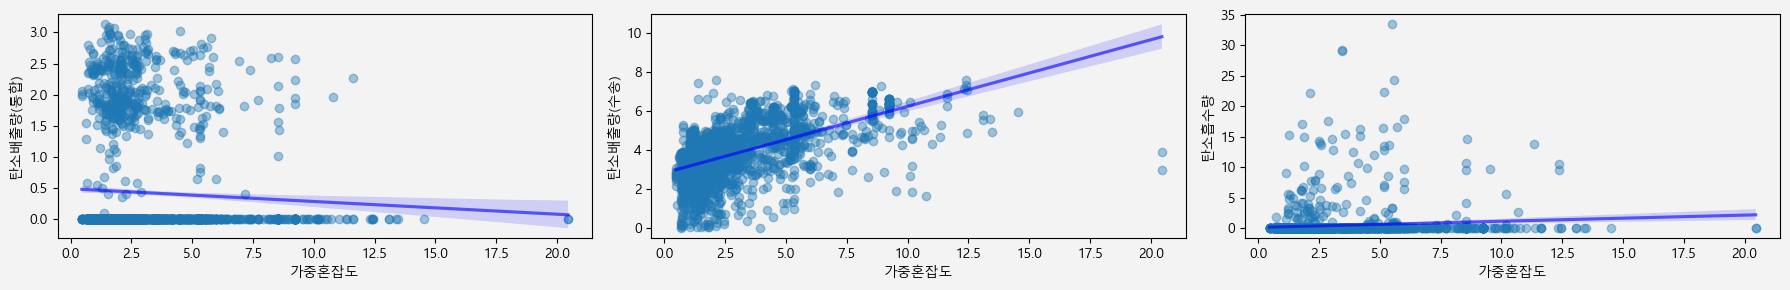

In [128]:
# ÎåÄÏÉÅ Î≥ÄÏàò Î™©Î°ù
target_vars = ['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)', 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)', 'ÌÉÑÏÜåÌù°ÏàòÎüâ']

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3), facecolor='#f4f3f3')
# ÏãúÍ∞ÅÌôî

for i, var in enumerate(target_vars):
    # Ïù¥ÏÉÅÍ∞í Ï†úÏô∏
    ax = axes[i]
    ax.set_facecolor('#f4f3f3')  # ÌîåÎ°Ø ÏòÅÏó≠ Î∞∞Í≤ΩÏÉâ
    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr = grid_result['Í∞ÄÏ§ëÌòºÏû°ÎèÑ'].corr(grid_result[var])
    print(f"ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.3f}")
    
    sns.regplot(
        data=grid_result,
        x='Í∞ÄÏ§ëÌòºÏû°ÎèÑ',
        y=var,
        ax=ax,
        line_kws={"alpha": 0.6, "color": 'blue'},
        scatter_kws={"alpha": 0.4},
        ci=95,
        color='#1f78b4'
    )
    
    ax.set_xlabel('Í∞ÄÏ§ëÌòºÏû°ÎèÑ')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

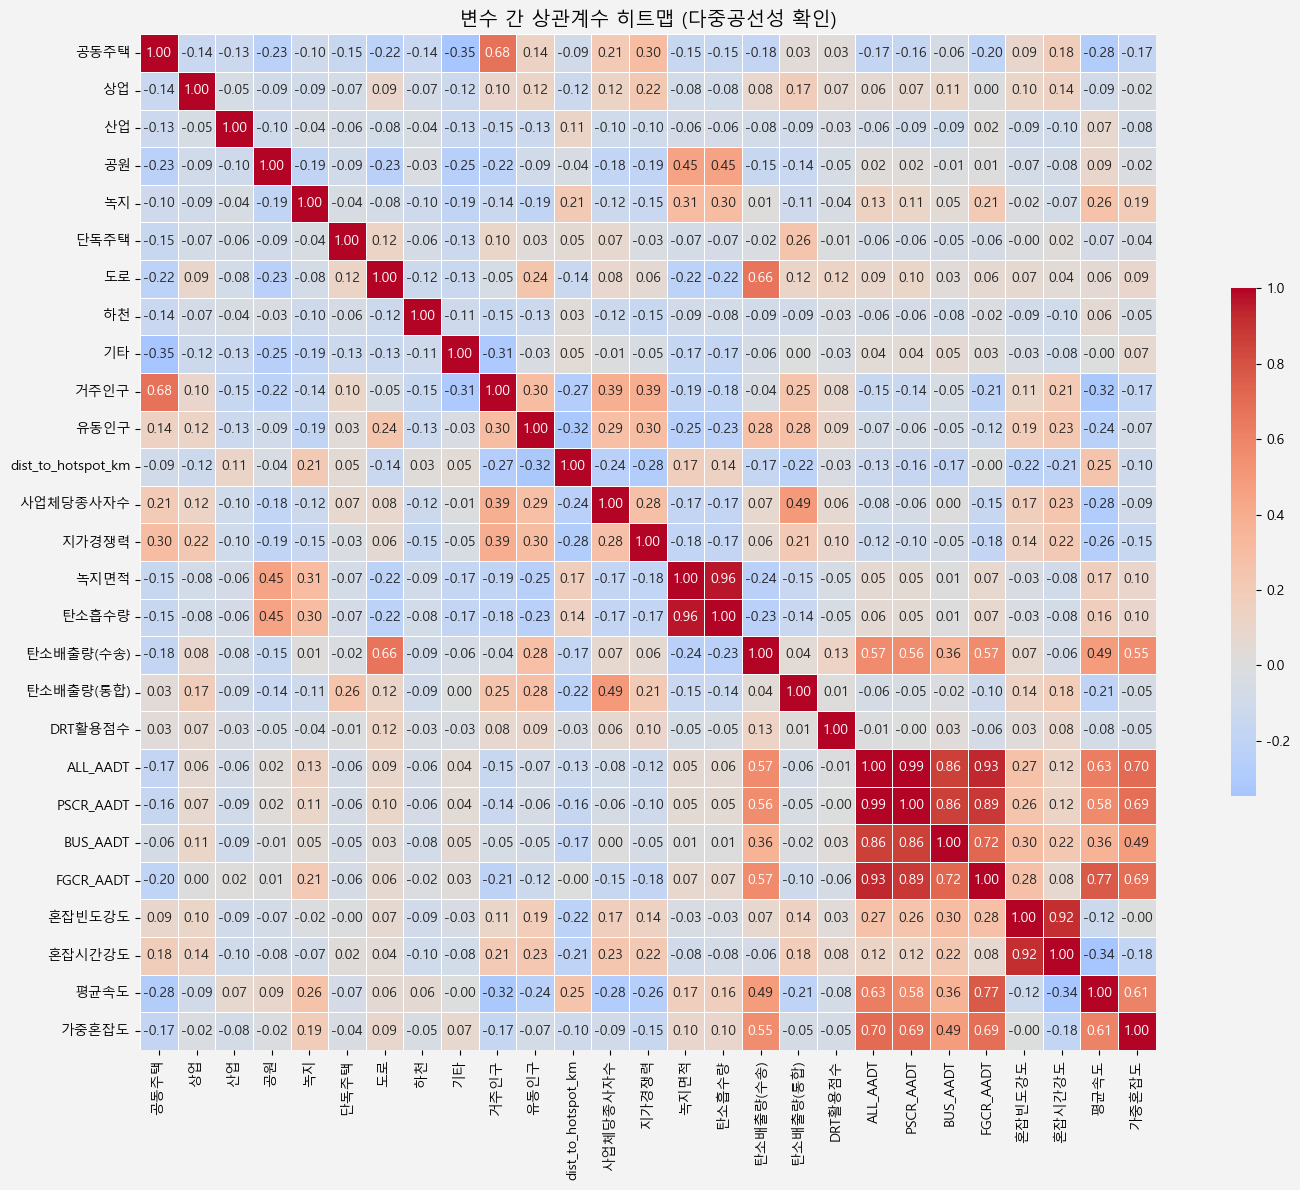

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏ ÎåÄÏÉÅ Ïó¥ ÏßÄÏ†ï (Ïà´ÏûêÌòïÎßå ÏûêÎèô Ï∂îÏ∂úÎèÑ Í∞ÄÎä•)
numerical_cols = grid_result.select_dtypes(include='number').columns.tolist()

# 2. ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞
corr = grid_result[numerical_cols].corr()

# 3. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 12), facecolor='#f4f3f3')
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .5}
)
plt.title('Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏)', fontsize=14)
plt.tight_layout()
plt.show()


In [160]:
grid_result

Íµ¨Î∂Ñ       gid                                           geometry  \
0      ÎèôÌÉÑÏã†ÎèÑÏãú  Îã§ÏÇ¨599119  POLYGON ((127.04810 37.20505, 127.04810 37.205...   
1      ÎèôÌÉÑÏã†ÎèÑÏãú  Îã§ÏÇ¨599120  POLYGON ((127.04810 37.20595, 127.04809 37.206...   
2      ÎèôÌÉÑÏã†ÎèÑÏãú  Îã§ÏÇ¨599121  POLYGON ((127.04809 37.20685, 127.04809 37.207...   
3      ÎèôÌÉÑÏã†ÎèÑÏãú  Îã§ÏÇ¨599122  POLYGON ((127.04809 37.20775, 127.04808 37.208...   
4      ÎèôÌÉÑÏã†ÎèÑÏãú  Îã§ÏÇ¨599123  POLYGON ((127.04808 37.20865, 127.04808 37.209...   
...      ...       ...                                                ...   
6958  Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú  Îã§ÏÇ¨259492  POLYGON ((126.66124 37.53915, 126.66123 37.540...   
6959  Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú  Îã§ÏÇ¨260488  POLYGON ((126.66241 37.53555, 126.66240 37.536...   
6960  Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú  Îã§ÏÇ¨260489  POLYGON ((126.66240 37.53645, 126.66239 37.537...   
6961  Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú  Îã§ÏÇ¨260490  POLYGON ((126.66239 37.53735, 126.66238 37.538...   
6962  Ï≤≠ÎùºÍµ≠Ï†úÎèÑÏãú  Îã§ÏÇ¨260491  POLYGON ((126.66238 37.53825, 126.66237 37.539...   

         Í≥µÎèôÏ£ºÌÉù   ÏÉÅÏóÖ   ÏÇ∞ÏóÖ        Í≥µÏõê   ÎÖπÏßÄ  Îã®ÎèÖÏ£ºÌÉù        ÎèÑÎ°ú        ÌïòÏ≤ú        Í∏∞ÌÉÄ  \
0     0.00000  0.0  0.0  1.000000  0.0   0.0  0.000000  0.000000  0.000000   
1     0.00000  0.0  0.0  1.000000  0.0   0.0  0.000000  0.000000  0.000000   
2     0.00000  0.0  0.0  1.000000  0.0   0.0  0.000000  0.000000  0.000000   
3     0.00000  0.0  0.0  1.000000  0.0   0.0  0.000000  0.000000  0.000000   
4     0.08897  0.0  0.0  0.655231  0.0   0.0  0.255799  0.000000  0.000000   
...       ...  ...  ...       ...  ...   ...       ...       ...       ...   
6958  0.00000  0.0  0.0  0.000000  0.0   0.0  0.000000  0.000000  1.000000   
6959  0.00000  0.0  0.0  0.000000  0.0   0.0  0.000000  0.993454  0.006546   
6960  0.00000  0.0  0.0  0.000000  0.0   0.0  0.000000  0.000000  1.000000   
6961  0.00000  0.0  0.0  0.000000  0.0   0.0  0.000000  0.000000  1.000000   
6962  0.00000  0.0  0.0  0.000000  0.0   0.0  0.000000  0.000000  1.000000   

          Í±∞Ï£ºÏù∏Íµ¨      Ïú†ÎèôÏù∏Íµ¨  dist_to_hotspot_km  ÏÇ¨ÏóÖÏ≤¥ÎãπÏ¢ÖÏÇ¨ÏûêÏàò     ÏßÄÍ∞ÄÍ≤ΩÏüÅÎ†•         ÎÖπÏßÄÎ©¥Ï†Å  \
0     0.000000  5.655922            1.085180  0.000000  0.251135  8943.435248   
1     0.000000  5.148192            1.049590  0.000000  0.320358  9977.773849   
2     0.000000  6.296741            1.022583  0.000000  0.320358  8435.691755   
3     0.000000  7.293541            1.004853  0.000000  0.000000  6928.062708   
4     6.230481  7.872230            0.996894  1.335001  0.943359   760.423706   
...        ...       ...                 ...       ...       ...          ...   
6958  0.000000  6.499742            0.537301  0.000000  0.420243     0.000000   
6959  0.000000  5.157733            0.534879  0.000000  0.108471     0.000000   
6960  0.000000  6.270175            0.529809  0.000000  0.305530     0.000000   
6961  0.000000  6.668482            0.543427  0.000000  0.229228     0.000000   
6962  0.000000  5.979873            0.574405  0.000000  0.000000     0.000000   

          ÌÉÑÏÜåÌù°ÏàòÎüâ  ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)  ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)  DRTÌôúÏö©Ï†êÏàò  ALL_AADT  PSCR_AADT  BUS_AADT  \
0     22.314729   0.000000        0.0      0.0       NaN        NaN       NaN   
1     28.262768   0.000000        0.0      0.0       NaN        NaN       NaN   
2     29.009220   0.000000        0.0      0.0       NaN        NaN       NaN   
3     23.893586   0.000000        0.0      0.0       NaN        NaN       NaN   
4      2.623352   2.868822        0.0      0.0  6660.399   5454.216   379.293   
...         ...        ...        ...      ...       ...        ...       ...   
6958   0.000000   0.000000        0.0      0.0       NaN        NaN       NaN   
6959   0.000000   4.931648        0.0      0.0       NaN        NaN       NaN   
6960   0.000000   4.931648        0.0      0.0       NaN        NaN       NaN   
6961   0.000000   4.931857        0.0      0.0       NaN        NaN    

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# ÏòàÏ∏° ÏÑ§Ï†ï Î™©Î°ù
targets = {
    'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)': ['Í±∞Ï£ºÏù∏Íµ¨', 'Ïú†ÎèôÏù∏Íµ¨', 'dist_to_hotspot_km', 'ÏÇ¨ÏóÖÏ≤¥ÎãπÏ¢ÖÏÇ¨ÏûêÏàò', 'ÏßÄÍ∞ÄÍ≤ΩÏüÅÎ†•', 'Îã®ÎèÖÏ£ºÌÉù'],
    'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)': ['ALL_AADT', 'Í∞ÄÏ§ëÌòºÏû°ÎèÑ', 'ÎèÑÎ°ú'],
    'ÌÉÑÏÜåÌù°ÏàòÎüâ': ['ÏßÄÍ∞ÄÍ≤ΩÏüÅÎ†•', 'Í≥µÏõê', 'ÎÖπÏßÄ', 'ÎÖπÏßÄÎ©¥Ï†Å']
}

# Î™®Îç∏ Ï†ïÏùò
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
}

results = []

for target, features in targets.items():
    df = grid_result[features + [target]].copy().dropna()

    # ‚úÖ Ïù¥ÏÉÅÍ∞í Ï†úÍ±∞Îäî 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)'Îßå ÏàòÌñâ
    if target == 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)':
        for var in features:
            df = df[~((df[var] == 0) & (df[target] > 0))]

    # ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ï†ïÍ∑úÌôî (ÏÑ†ÌòïÎ™®Îç∏Îßå ÏÇ¨Ïö©)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        if model_name in ['Linear Regression', 'Ridge Regression']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results.append({
            'Target': target,
            'Model': model_name,
            'MAE': round(mae, 3),
            'RMSE': round(rmse, 3),
            'R2': round(r2, 3)
        })

# Í≤∞Í≥º Ï∂úÎ†•
results_df = pd.DataFrame(results).sort_values(by=['Target', 'RMSE'])

In [162]:
results_df

Target              Model    MAE   RMSE     R2
7   ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)            XGBoost  0.607  0.799  0.701
6   ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)      Random Forest  0.597  0.806  0.696
4   ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)  Linear Regression  0.825  1.073  0.462
5   ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)   Ridge Regression  0.825  1.073  0.462
2   ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)      Random Forest  0.025  0.144  0.915
3   ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)            XGBoost  0.025  0.156  0.901
0   ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)  Linear Regression  0.165  0.377  0.420
1   ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)   Ridge Regression  0.165  0.377  0.420
8       ÌÉÑÏÜåÌù°ÏàòÎüâ  Linear Regression  0.454  1.419  0.934
9       ÌÉÑÏÜåÌù°ÏàòÎüâ   Ridge Regression  0.454  1.419  0.934
11      ÌÉÑÏÜåÌù°ÏàòÎüâ            XGBoost  0.419  1.503  0.926
10      ÌÉÑÏÜåÌù°ÏàòÎüâ      Random Forest  0.440  1.576  0.919

##### SHAP Í∞ÄÏ§ëÏπò

 96%|=================== | 5406/5617 [00:11<00:00]       


üìå SHAP Summary: ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©) (Random Forest)


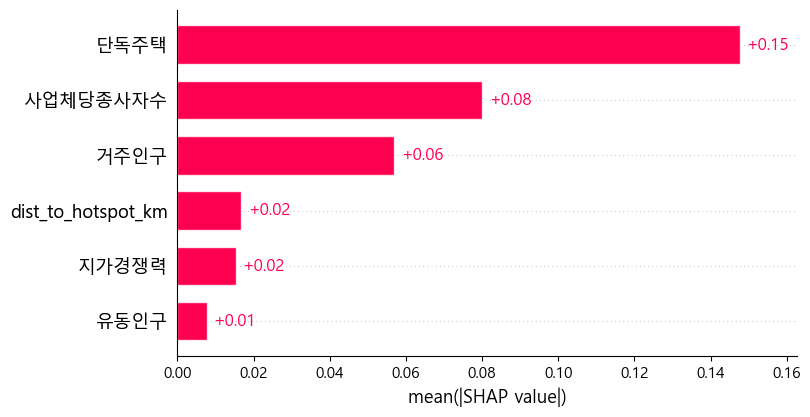

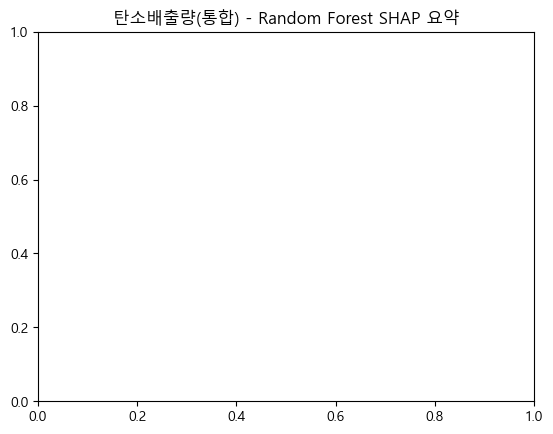


üìå SHAP Summary: ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°) (XGBoost)


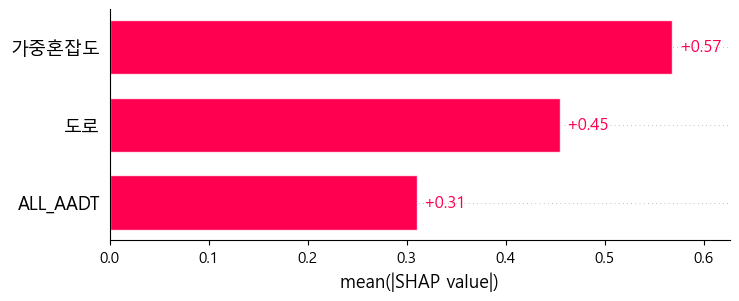

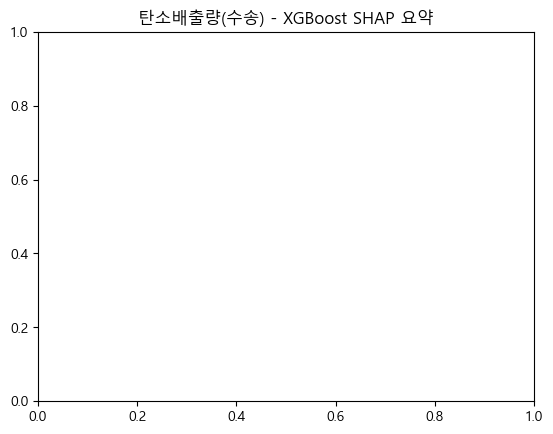


üìå SHAP Summary: ÌÉÑÏÜåÌù°ÏàòÎüâ (Linear Regression)


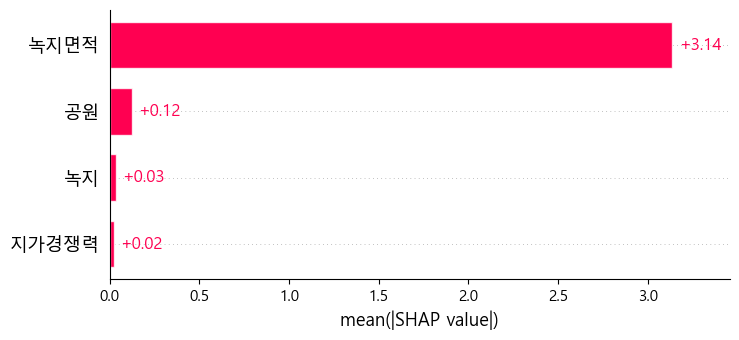

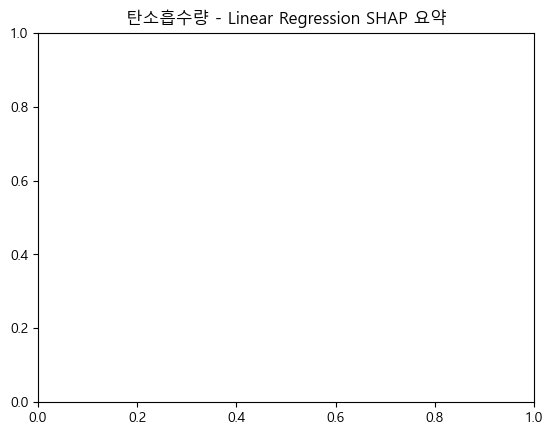

In [167]:
import shap
import matplotlib.pyplot as plt

shap_values_all = {}

# SHAP Î∂ÑÏÑù: ÏµúÏ†Å Î™®Îç∏ Í∏∞Ï§ÄÏúºÎ°ú SHAP Í∞í ÎèÑÏ∂ú
for target, features in targets.items():
    df = grid_result[features + [target]].copy().dropna()

    if target == 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)':
        for var in features:
            df = df[~((df[var] == 0) & (df[target] > 0))]

    X = df[features]
    y = df[target]

    # ÏµúÏ†Å Î™®Îç∏ ÏÑ†ÌÉù
    best_model_name = results_df[results_df['Target'] == target].sort_values('RMSE').iloc[0]['Model']
    best_model = models[best_model_name]

    # ÌïôÏäµ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ)
    if best_model_name in ['Linear Regression', 'Ridge Regression']:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        best_model.fit(X_scaled, y)
        explainer = shap.Explainer(best_model, X_scaled, feature_names=features)
        shap_values = explainer(X_scaled)
    else:
        best_model.fit(X, y)
        explainer = shap.Explainer(best_model, X, feature_names=features)
        shap_values = explainer(X)

    # SHAP ÏöîÏïΩ ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
    print(f"\nüìå SHAP Summary: {target} ({best_model_name})")
    fig.patch.set_facecolor('#f4f3f3')
    ax.set_facecolor('#f4f3f3')
    shap.plots.bar(shap_values, max_display=len(features))
    plt.title(f"{target} - {best_model_name} SHAP ÏöîÏïΩ")
    plt.show()

    # SHAP ÌèâÍ∑† Ï†àÎåÄÍ∞í ‚Üí Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
    shap_df = pd.DataFrame({
        'Feature': features,
        'SHAP_Importance': np.abs(shap_values.values).mean(axis=0)
    }).sort_values(by='SHAP_Importance', ascending=False).reset_index(drop=True)

    shap_values_all[target] = shap_df


In [166]:
shap_values_all

{'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)':               Feature  SHAP_Importance
 0                Îã®ÎèÖÏ£ºÌÉù         0.147702
 1            ÏÇ¨ÏóÖÏ≤¥ÎãπÏ¢ÖÏÇ¨ÏûêÏàò         0.080006
 2                Í±∞Ï£ºÏù∏Íµ¨         0.056965
 3  dist_to_hotspot_km         0.016773
 4               ÏßÄÍ∞ÄÍ≤ΩÏüÅÎ†•         0.015269
 5                Ïú†ÎèôÏù∏Íµ¨         0.007678,
 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÏàòÏÜ°)':     Feature  SHAP_Importance
 0     Í∞ÄÏ§ëÌòºÏû°ÎèÑ         0.568128
 1        ÎèÑÎ°ú         0.454567
 2  ALL_AADT         0.310222,
 'ÌÉÑÏÜåÌù°ÏàòÎüâ':   Feature  SHAP_Importance
 0    ÎÖπÏßÄÎ©¥Ï†Å         3.136212
 1      Í≥µÏõê         0.121692
 2      ÎÖπÏßÄ         0.033183
 3   ÏßÄÍ∞ÄÍ≤ΩÏüÅÎ†•         0.022873}

##### Ïã§Ï†ú ÏòàÏ∏° ÎπÑÍµê & Î≥ÄÏàò Ï§ëÏöîÎèÑ

C:\Users\user\AppData\Local\Temp\ipykernel_22508\4111052384.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_22508\4111052384.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_22508\4111052384.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




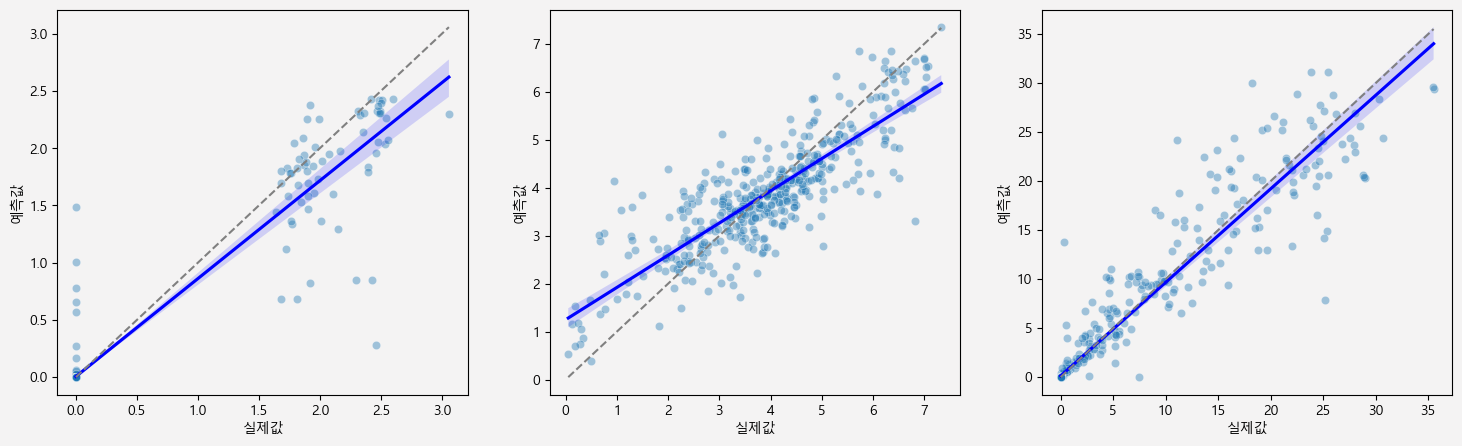

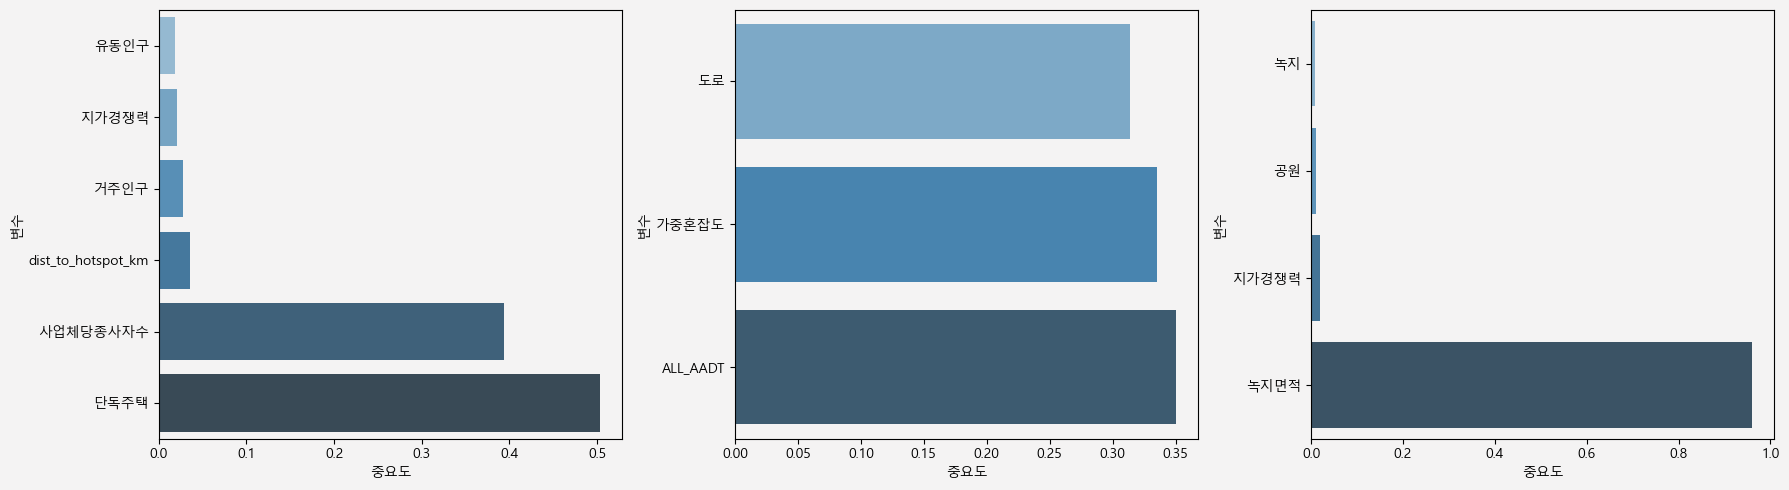

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

fig_pred, axes_pred = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), facecolor='#f4f3f3')
fig_imp, axes_imp = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), facecolor='#f4f3f3')

for i, (target, features) in enumerate(targets.items()):
    df = grid_result[features + [target]].copy().dropna()

    # Ïù¥ÏÉÅÍ∞í Ï†úÍ±∞: ÌÜµÌï©Îßå
    if target == 'ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ(ÌÜµÌï©)':
        for var in features:
            df = df[~((df[var] == 0) & (df[target] > 0))]

    # Î∂ÑÌï†
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Î™®Îç∏ ÌïôÏäµ
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # ÏòàÏ∏° vs Ïã§Ï†úÍ∞í ÏãúÍ∞ÅÌôî
    ax = axes_pred[i]
    ax.set_facecolor('#f4f3f3')
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, ax=ax)
    sns.regplot(x=y_test, y=y_pred, scatter=False, color='blue', ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray') # ÏòàÏ∏° vs Ïã§Ï†ú
    ax.set_xlabel("Ïã§Ï†úÍ∞í")
    ax.set_ylabel("ÏòàÏ∏°Í∞í")

    # Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
    importances = rf.feature_importances_
    imp_df = pd.DataFrame({'Î≥ÄÏàò': features, 'Ï§ëÏöîÎèÑ': importances}).sort_values(by='Ï§ëÏöîÎèÑ', ascending=True)
    ax2 = axes_imp[i]
    ax2.set_facecolor('#f4f3f3')
    sns.barplot(data=imp_df, x='Ï§ëÏöîÎèÑ', y='Î≥ÄÏàò', palette='Blues_d', ax=ax2) # Î≥ÄÏàò Ï§ëÏöîÎèÑ

plt.tight_layout()
plt.show()
